# Анализ выборки объектов по г. Екатеринбург

Выборка без отброса выбросов

## Импорт

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import plotly.express as px

from IPython.display import display
pd.options.display.max_columns = None

%matplotlib inline

## Загрузка исходного файла

In [2]:
df0 = pd.read_excel('ekb.xlsx', )

In [3]:
display(df0.head(5))

,ID,Мусор,Агрегатор,LN(Цена),Цена,Цена_перв,Цена(кв.м),dup_all,dup_1,dup_2,Пересечения,dup(<=0.03),Пересечения(<=0.03),Пересечения(>0.03),dup_res,ОПлощадь,Оплощадь_перв,Комнатность,Комнатность_перв,Этаж_1,Этаж_2,Этаж_3,Этаж_4,Этаж/Этажность,Этажность_1,Этажность_2,Неточности,Переменная этажность,Р,Р%,Минжкх,П,Правдом,П.1,Этажность_перв,ГП,Неточности.1,Р.1,Минжкх.1,Правдом.1,Год постройки,Аварийные,Исп,Ремонт_1,Ремонт_перв,Санузел,Стены_1,Стены_перв,Адрес_перв,Адрес,Проверка номера дома,Дом,Дом_Ya,Проверка,Адрес_yandex,Долгота,Широта,Сцепка_к,Сцепка_3,Сцепка_4,Дата,Просмотры,Раст_центр_1,Раст_центр_2,Раст_метро_1,Раст_метро_2,Районы_1,Районы_2,Вид_1,Вид_2,Вид_БД,Куда,ЖК_поиск,ЖК_БД,ЖК_не сдан,Многоуровневость,Терраса,ПОИСК,Текст,Код объекта,Выдача ключей,Характеристики,Площадь кухни,Жилая площадь,Высота потолков,Кухня-гостиная,Балкон,Остекление балкона,Материал окон,Солнечная сторона,Вид из окон,Домофон,Железная дверь,Счетчик воды,Подключённые сервисы,Лифт,Пассажирский лифт,Грузовой лифт,Номер дома,Колясочная,Двор,Парковка,"Бесплатное юридическое сопровождение до и после сделки. Помогаем оформить нужные документы, защищаем интересы клиента в спорных ситуациях",Ссылка,Продавец,Тип комнат,Вид сделки,Счетчик тепла,Детская площадка,Двор.1,Парковка.1,Велосипедная,Коммунальные платежи,Из мебели в квартире остается,Пандус,Кладовка,Площадка для выгула собак,Корпус,Площадь балкона,Видеодомофон,Охранная сигнализация,Кондиционер,Консьерж,Из техники в квартире остается,Система водонагрева,Многоуровневая,Нежилые помещения на первом этаже,строение,Квартира угловая / торцевая,Способ продажи,Отделка,Название новостройки,"Корпус, строение",Тип участия,Срок сдачи,Запланирован снос
0,1_этажи,0,этажи,15.761421,7000000,7200000,99573.257468,0,0,0,0,0,0,0,0,70.3,70.3 м²,2к,2-комн.,3,средний,этажи_2-5,этажи_2-5,3 из 26,26,от 20 до 30,0.0,переменная этажность,0.0,1.0,26.0,1.0,NaN,NaN,NaN,2009.0,NaN,0.0,2009.0,NaN,2009.0,нет,NaN,стандартный,косметический ремонт,раздельный,кирпичные,кирпичные,"р-н Широкая речка, ул. Соболева, 19 (5.9 км до...","Екатериндург, р-н Широкая речка, ул. Соболева, 19",19,19,19,1.0,"Россия, Свердловская область, Екатеринбург, ул...",60.514731,56.810482,60.514731 56.810482,3 60.514731 56.810482,NaN,NaN,11 просмотров,5858.724489,от_5000_до_10000,5679.705750,на_удалении,Академический,Академический,нет,нет,нет,нет,нет,нет,NaN,0.0,0.0,0,Продается просторная 2-комнатная квартира в ЖК...,10347713.0,NaN,"2-комн. квартира, 70.3м², 3/26 этаж",16 м²,NaN,2.7 м,да,есть балкон,есть,пластиковые,часть окон,во двор,NaN,NaN,NaN,"телефон, интернет, кабельное телевидение",пассажирский и грузовой,NaN,NaN,19,есть,закрытый двор,"наземный паркинг, подземный паркинг",да,https://ekb.etagi.com/realty/10347713/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2_этажи,0,этажи,16.231424,11200000,11400000,143589.743590,0,0,1,1,1,1,0,1,78.0,78 м²,3к,3-комн.,21,средний,этажи_11-25,этажи_11-25,21 из 24,24,от 20 до 30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.0,0.0,NaN,NaN,NaN,2022.0,нет,NaN,без_отделки,улучшенная черновая отделка,раздельный,NaN,монолитно-кирпичный,"р-н Юго-Западный, ул. Амундсена, 7 (3.7 км до ...","Екатериндург, р-н Юго-Западный, ул. Амундсена, 7",7,7,7,1.0,"Россия, Свердловская область, Екатеринбург, ул...",60.590117,56.804397,60.590117 56.804397,21 60.590117 56.804397,NaN,NaN,154 просмотра,3732.854971,от_1500_до_5000,1297.794974,на_удалении,Юго_Западный,Юго_Западный,нет,нет,нет,нет,нет,нет,NaN,0.0,0.0,0,Супер цена!!!!!Продается трехкомнатная квартир...,10293400.0,NaN,"3-комн. квартира в «Событие», 78м², 21/24 этаж",20 м²,NaN,2.7 м,да,есть балкон,есть,пластиковые,часть окон,во двор,NaN,NaN,NaN,NaN,пассажирский и грузовой,NaN,NaN,7,есть,NaN,подземный паркинг,да,https://ekb.etagi.com/realty/10293400/,NaN,NaN,NaN,NaN,"песочница, качели, горка",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3_этажи,0,этажи,

In [4]:
df0.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13332 entries, 0 to 13331
Data columns (total 136 columns):
 #    Column                                                                                                                                     Non-Null Count  Dtype  
---   ------                                                                                                                                     --------------  -----  
 0    ID                                                                                                                                         13332 non-null  object 
 1    Мусор                                                                                                                                      13332 non-null  int64  
 2    Агрегатор                                                                                                                                  13332 non-null  object 
 3    LN(Цена)                               

## Удаление дубликатов и мусора

In [5]:
df1 = df0[(df0['Мусор'] == 0) & (df0['dup_res'] == 0)]

In [6]:
len(df1)

8153

## Удаление лишних столбцов

In [7]:
df = df1[[
    'ID',
    'Цена',
    'Цена(кв.м)',
    'ОПлощадь',
    'Комнатность',
    'Этаж_1',
    'Этаж_2',
    'Этаж_3',
    'Этаж_4',
    'Этажность_1',
    'Этажность_2',
    'ГП',
    'Ремонт_1',
    'Стены_1',
    'Раст_центр_1',
    'Раст_центр_2',
    'Раст_метро_1',
    'Раст_метро_2',
    'Районы_1',
    'Районы_2',
    'Вид_1',
    'Вид_2',
    'ЖК_БД',
    'Многоуровневость',
    'Терраса',
    'Балкон'
]].reset_index(drop=True)

In [8]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8153 non-null   object 
 1   Цена              8153 non-null   int64  
 2   Цена(кв.м)        8153 non-null   float64
 3   ОПлощадь          8153 non-null   float64
 4   Комнатность       8153 non-null   object 
 5   Этаж_1            8153 non-null   int64  
 6   Этаж_2            8153 non-null   object 
 7   Этаж_3            8153 non-null   object 
 8   Этаж_4            8153 non-null   object 
 9   Этажность_1       8153 non-null   int64  
 10  Этажность_2       8153 non-null   object 
 11  ГП                8153 non-null   float64
 12  Ремонт_1          8153 non-null   object 
 13  Стены_1           8153 non-null   object 
 14  Раст_центр_1      8153 non-null   float64
 15  Раст_центр_2      8153 non-null   object 
 16  Раст_метро_1      8153 non-null   float64


## Предварительный анализ и предобработка данных

In [9]:
display(df.head(5))

,ID,Цена,Цена(кв.м),ОПлощадь,Комнатность,Этаж_1,Этаж_2,Этаж_3,Этаж_4,Этажность_1,Этажность_2,ГП,Ремонт_1,Стены_1,Раст_центр_1,Раст_центр_2,Раст_метро_1,Раст_метро_2,Районы_1,Районы_2,Вид_1,Вид_2,ЖК_БД,Многоуровневость,Терраса,Балкон
0,1_этажи,7000000,99573.257468,70.30,2к,3,средний,этажи_2-5,этажи_2-5,26,от 20 до 30,2009.0,стандартный,кирпичные,5858.724489,от_5000_до_10000,5679.705750,на_удалении,Академический,Академический,нет,нет,нет,0.0,0.0,есть балкон
1,3_этажи,4300000,106435.643564,40.40,2к,4,средний,этажи_2-5,этажи_2-5,5,до 5,1960.0,стандартный,панельные,2742.075053,от_1500_до_5000,2127.371894,на_удалении,Центральный_1,Центральный,нет,нет,нет,0.0,0.0,два балкона и более
2,6_этажи,5300000,124941.065535,42.42,1к,14,средний,этажи_11-25,этажи_11-25,15,от 10 до 20,2012.0,стандартный,блочные,4346.538443,от_1500_до_5000,2652.399714,на_удалении,Пионерский,Пионерский,нет,нет,нет,0.0,0.0,есть балкон
3,7_этажи,6450000,113556.338028,56.80,2к,4,средний,этажи_2-5,этажи_2-5,9,от 5 до 10,2014.0,стандартный,монолитные,8068.164467,от_5000_до_10000,3430.890903,на_удалении,Уктус,Уктус,нет,нет,нет,0.0,0.0,есть балкон
4,15_этажи,7450000,168552.036199,44.20,1к,6,средний,этажи_6-10,этажи_6-10,16,от 10 до 20,2016.0,стандартный,монолитные,3843.037780,от_1500_до_5000,559.052311,рядом,Южный,Южный,нет,нет,нет,0.0,0.0,есть балкон


In [10]:
df['ГП'] = df['ГП'].astype('int')
df['Цена(кв.м)'] = df['Цена(кв.м)'].astype('int')
df.loc[(df['Балкон'] == ' балкон') | (df['Балкон'] == 'есть балкон'), 'Балкон'] = 'балкон'
df.loc[(df['Балкон'] == ' лоджия') | (df['Балкон'] == 'лоджия'), 'Балкон'] = 'лоджия'
df.loc[(df['Балкон'] == ' балкон, лоджия') | (df['Балкон'] == 'балкон и лоджия'), 'Балкон'] = 'балкон, лоджия'

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8153 entries, 0 to 8152
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8153 non-null   object 
 1   Цена              8153 non-null   int64  
 2   Цена(кв.м)        8153 non-null   int64  
 3   ОПлощадь          8153 non-null   float64
 4   Комнатность       8153 non-null   object 
 5   Этаж_1            8153 non-null   int64  
 6   Этаж_2            8153 non-null   object 
 7   Этаж_3            8153 non-null   object 
 8   Этаж_4            8153 non-null   object 
 9   Этажность_1       8153 non-null   int64  
 10  Этажность_2       8153 non-null   object 
 11  ГП                8153 non-null   int64  
 12  Ремонт_1          8153 non-null   object 
 13  Стены_1           8153 non-null   object 
 14  Раст_центр_1      8153 non-null   float64
 15  Раст_центр_2      8153 non-null   object 
 16  Раст_метро_1      8153 non-null   float64


## Анализ численных признаков

In [12]:
params = ['ОПлощадь', 'ГП', 'Раст_центр_1', 'Раст_метро_1', 'Этаж_1', 'Этажность_1']

ОПлощадь


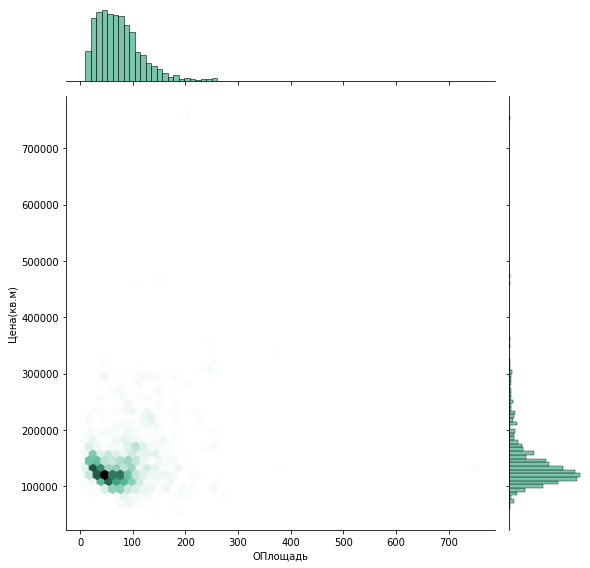

Корреляция цены от ОПлощадь: 23.45%

ГП


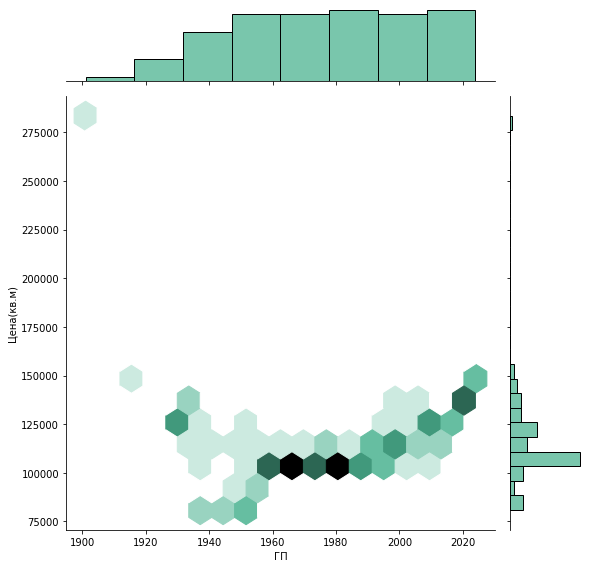

Корреляция цены от ГП: 8.49%

Раст_центр_1


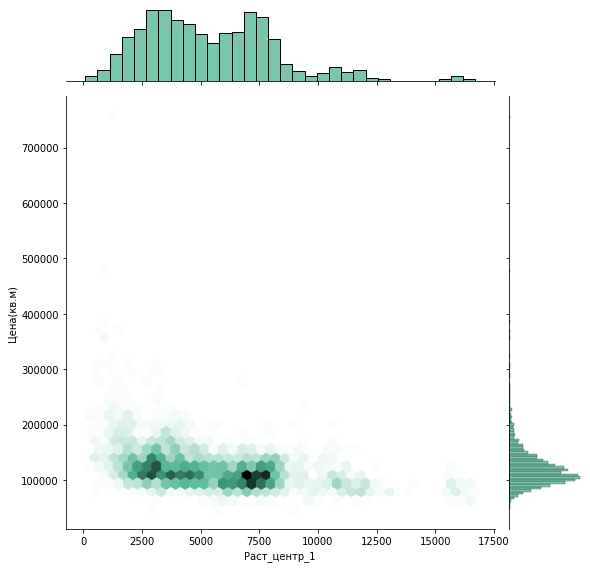

Корреляция цены от Раст_центр_1: -41.09%

Раст_метро_1


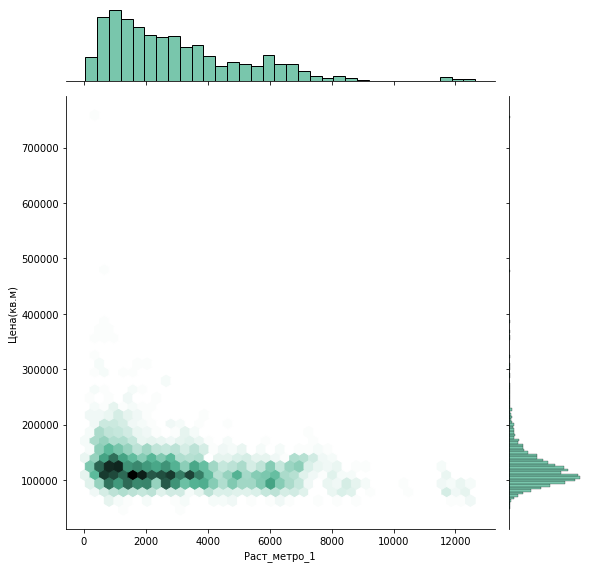

Корреляция цены от Раст_метро_1: -29.58%

Этаж_1


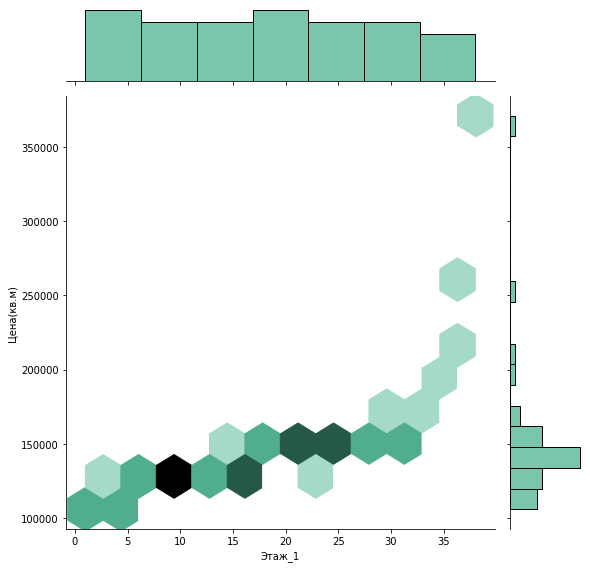

Корреляция цены от Этаж_1: 72.05%

Этажность_1


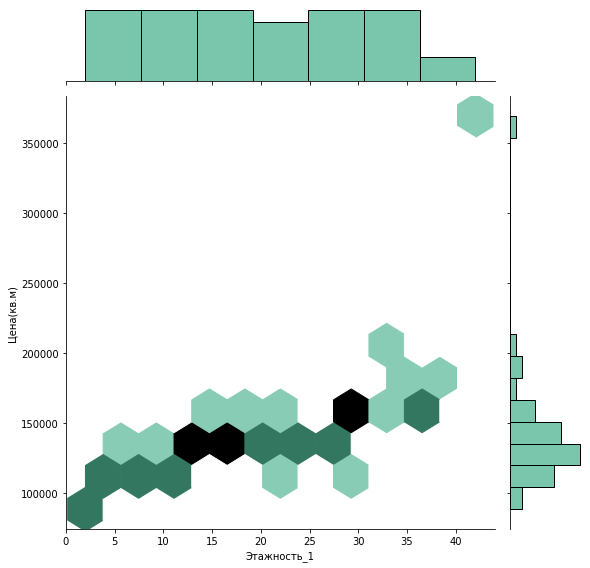

Корреляция цены от Этажность_1: 70.37%



In [13]:
for description in params:
    print(description)
    df_g = df.groupby(description).agg({'Цена(кв.м)': 'median'})
    df_g[description] = df_g.index
    sns.jointplot(x=df_g[description], y=df_g['Цена(кв.м)'], kind='hex', color="#4CB391", height=8,)# ylim=(0, 300000))
    #df_g.plot(x=description, y='Цена(кв.м)', kind='hexbin', grid=True, figsize=(12, 4), gridsize=30, sharex=False, )
    plt.show()
    print('Корреляция цены от {}: {:.2%}'.format(description, df_g['Цена(кв.м)'].corr(df_g[description])))
    print()

Зависимости медиан цены от сгрупиированных признаков
ОПлощадь


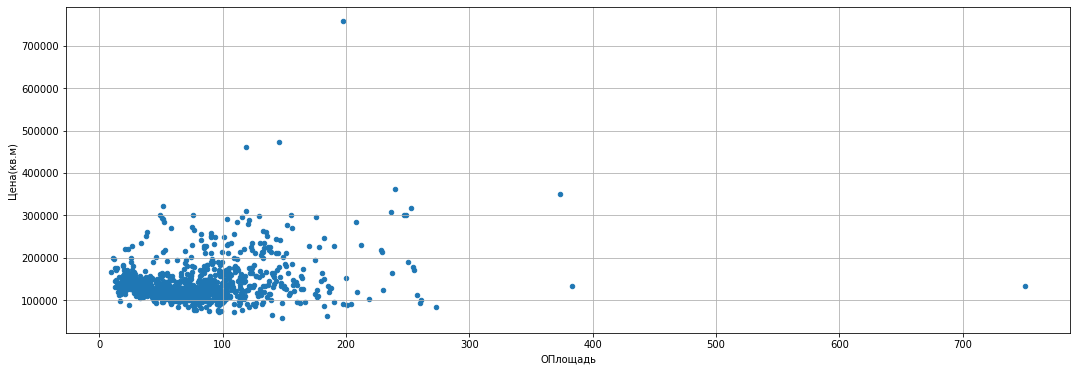


ГП


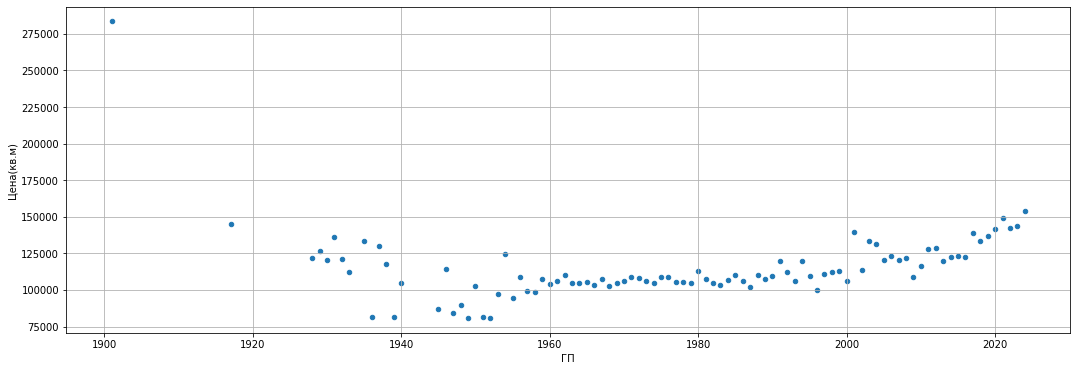


Раст_центр_1


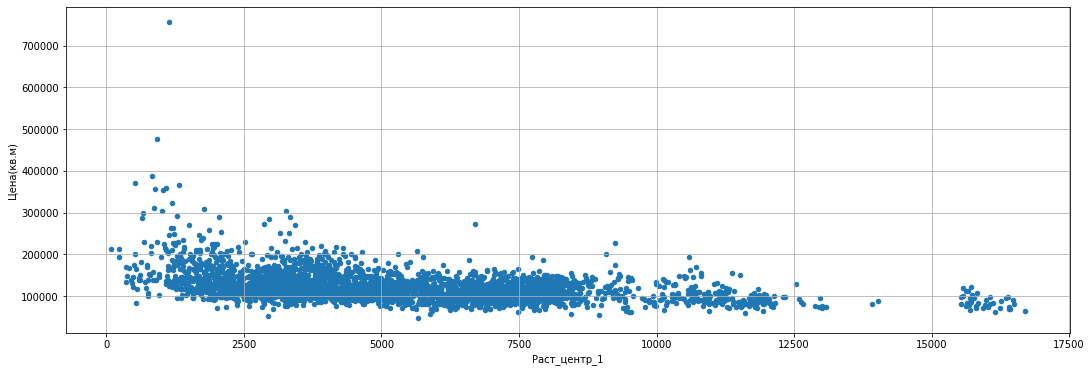


Раст_метро_1


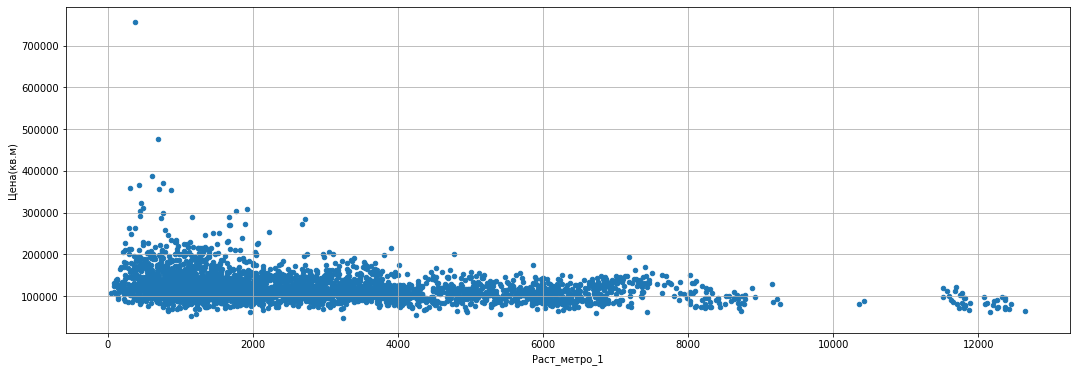


Этаж_1


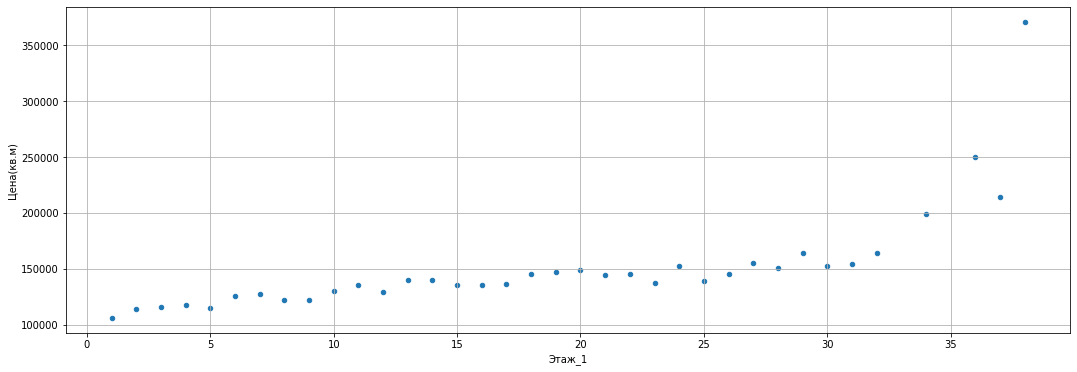


Этажность_1


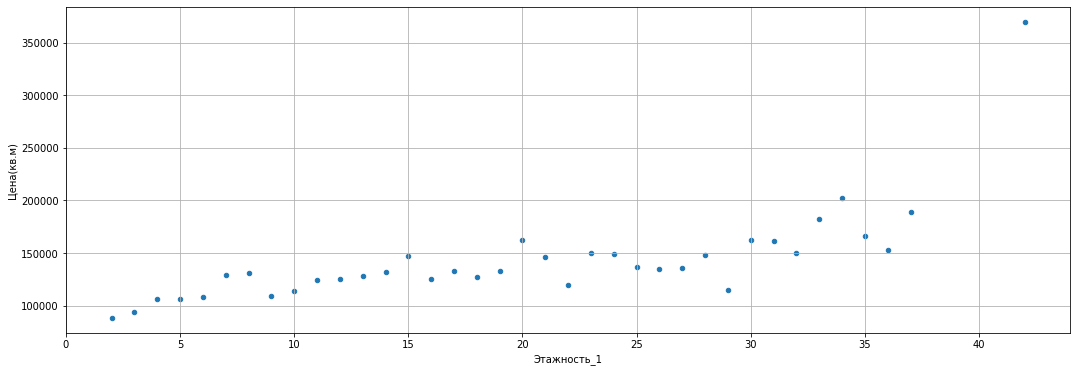

In [14]:
print('Зависимости медиан цены от сгрупиированных признаков')
for description in params:
    print(description)
    df_g = df.groupby(description)['Цена(кв.м)'].agg('median').reset_index()
    df_g.plot.scatter(x=description, y='Цена(кв.м)', grid=True, figsize=(18, 6), )
    plt.show()
    print()

## Анализ категориальных признаков

In [15]:
params = ['Комнатность', 'Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_2', 'Ремонт_1', 'Стены_1', 'Раст_центр_2', 'Раст_метро_2', 'Вид_1', 'Вид_2', 'ЖК_БД', 'Многоуровневость', 'Терраса', 'Балкон']

Комнатность


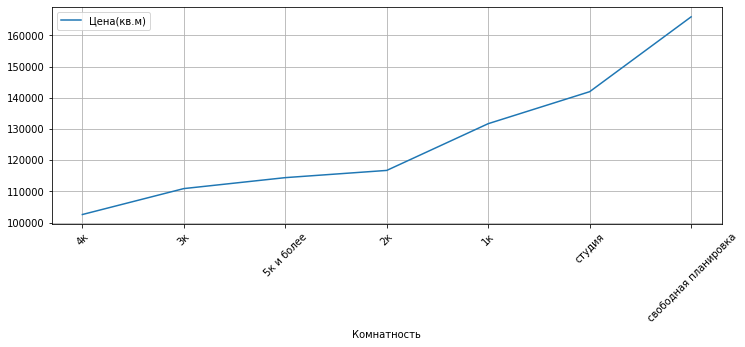

                      Цена(кв.м)      
                          median count
Комнатность                           
4к                      102597.5   344
3к                      110912.0  1759
5к и более              114421.5    64
2к                      116735.0  2847
1к                      131721.5  2518
студия                  141975.0   613
 свободная планировка   165966.5     8

Этаж_2


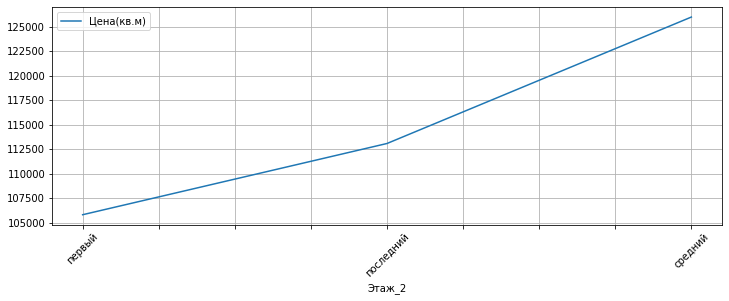

          Цена(кв.м)      
              median count
Этаж_2                    
первый      105807.5   764
последний   113070.5   996
средний     125964.0  6393

Этаж_3


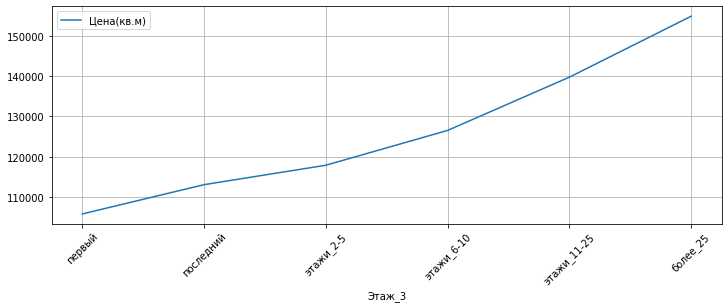

            Цена(кв.м)      
                median count
Этаж_3                      
первый        105807.5   764
последний     113070.5   996
этажи_2-5     117893.5  2828
этажи_6-10    126532.5  1778
этажи_11-25   139755.0  1710
более_25      154870.0    77

Этаж_4


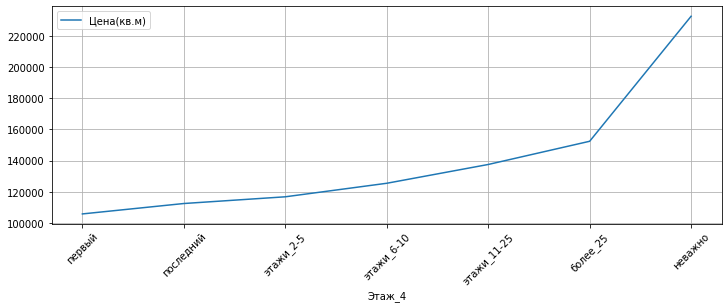

            Цена(кв.м)      
                median count
Этаж_4                      
первый        105802.0   763
последний     112474.5   982
этажи_2-5     116782.0  2740
этажи_6-10    125454.0  1711
этажи_11-25   137500.0  1632
более_25      152380.0    69
неважно       232537.0   256

Этажность_2


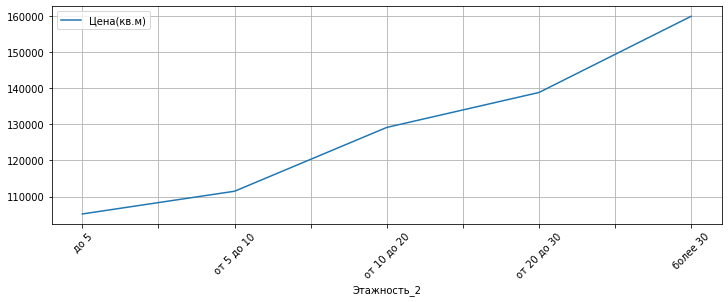

            Цена(кв.м)      
                median count
Этажность_2                 
до 5          105158.5  1824
от 5 до 10    111462.5  1926
от 10 до 20   129166.0  2107
от 20 до 30   138856.5  1896
более 30      160000.0   400

Ремонт_1


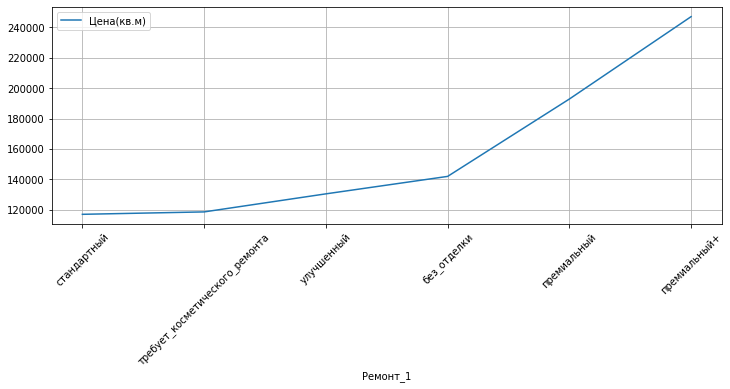

                               Цена(кв.м)      
                                   median count
Ремонт_1                                       
стандартный                      117114.0  4173
требует_косметического_ремонта   118696.5  1198
улучшенный                       130555.0  2245
без_отделки                      142023.0   381
премиальный                      192857.0   141
премиальный+                     246981.0    15

Стены_1


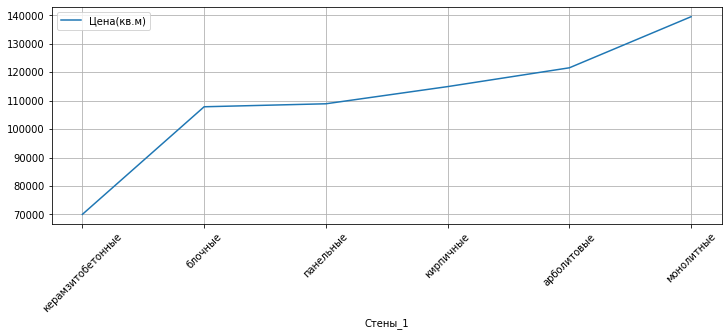

                  Цена(кв.м)      
                      median count
Стены_1                           
керамзитобетонные    70032.0     1
блочные             107821.0   468
панельные           108870.0  1903
кирпичные           114903.5  2140
арболитовые         121507.5    50
монолитные          139455.0  3591

Раст_центр_2


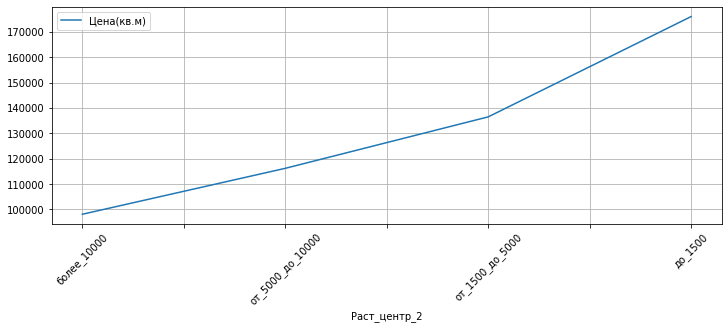

                 Цена(кв.м)      
                     median count
Раст_центр_2                     
более_10000         98118.0   494
от_5000_до_10000   116207.0  3980
от_1500_до_5000    136470.0  3409
до_1500            175980.5   270

Раст_метро_2


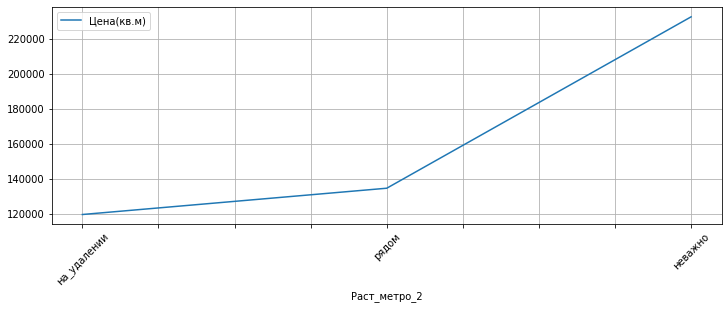

             Цена(кв.м)      
                 median count
Раст_метро_2                 
на_удалении    119540.0  6735
рядом          134562.5  1162
неважно        232537.0   256

Вид_1


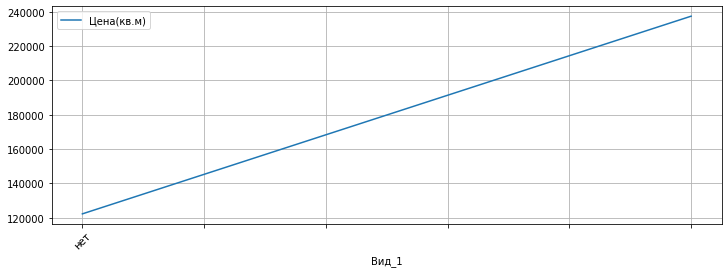

      Цена(кв.м)      
          median count
Вид_1                 
нет     122222.0  8114
есть    237331.0    39

Вид_2


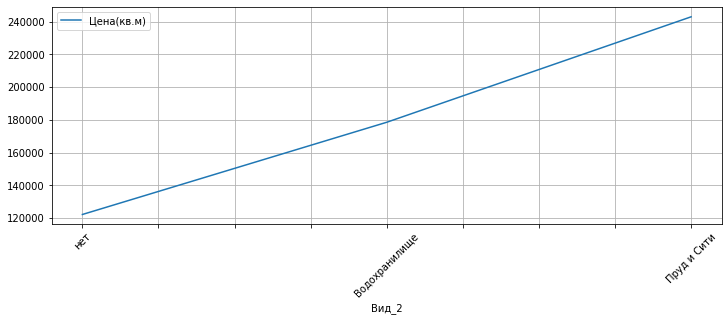

              Цена(кв.м)      
                  median count
Вид_2                         
нет             122222.0  8114
Водохранилище   178585.5     4
Пруд и Сити     243036.0    35

ЖК_БД


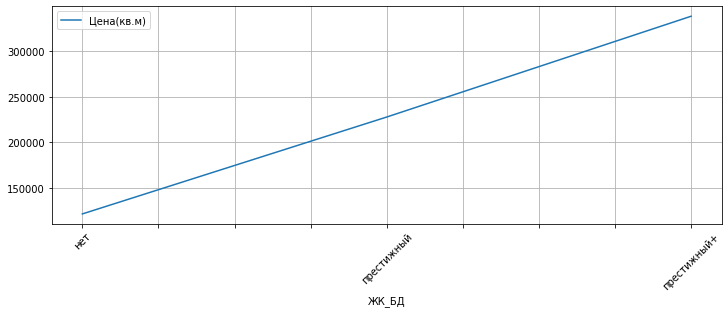

            Цена(кв.м)      
                median count
ЖК_БД                       
нет           121315.0  7897
престижный    227704.0   238
престижный+   338382.0    18

Многоуровневость


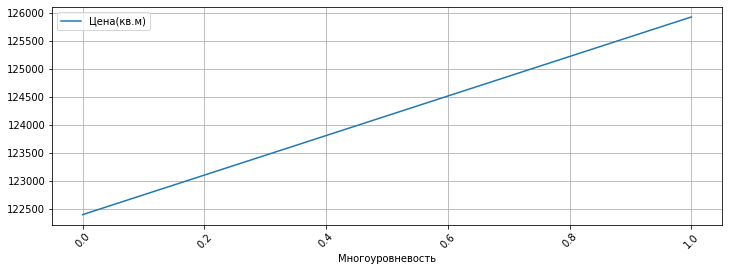

                 Цена(кв.м)      
                     median count
Многоуровневость                 
0.0                122401.0  8099
1.0                125925.0    51

Терраса


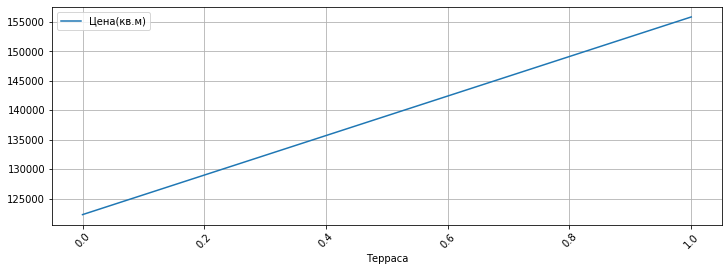

        Цена(кв.м)      
            median count
Терраса                 
0.0       122297.0  8109
1.0       155844.0    41

Балкон


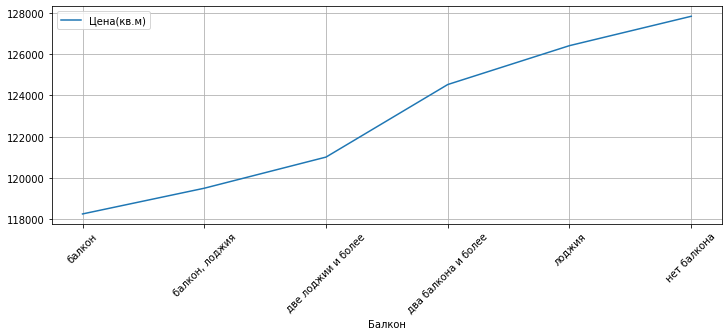

                    Цена(кв.м)      
                        median count
Балкон                              
балкон                118257.0  3164
балкон, лоджия        119503.0   151
две лоджии и более    121012.0    17
два балкона и более   124528.0    23
лоджия                126412.0  3072
нет балкона           127835.0   209



In [16]:
for description in params:
    print(description)
    report = df.groupby(description).agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
    f = report.plot(kind='line',  grid=True, figsize=(12, 4), )
    plt.xticks(rotation=45)
    plt.show()
    print(df.groupby(description).agg({'Цена(кв.м)': ['median', 'count']}).sort_values(('Цена(кв.м)', 'median')))
    print()

### Проверка отклонений в зависимости по балконам

In [17]:
df.groupby(['Балкон', 'Ремонт_1']).agg({'Цена(кв.м)': ['median', 'count']})#.sort_values(('Цена(кв.м)', 'median'))

Цена(кв.м)      
                                                       median count
Балкон              Ремонт_1                                       
балкон              без_отделки                      138555.0    89
                    премиальный                      188705.0    41
                    премиальный+                     218490.5     4
                    стандартный                      113808.0  1723
                    требует_косметического_ремонта   108598.0   454
                    улучшенный                       128113.0   853
балкон, лоджия      без_отделки                      180263.0     5
                    премиальный                      158825.5     6
                    премиальный+                     153571.0     3
                    стандартный                      116667.0    65
                    требует_косметического_ремонта    97443.5    12
                    улучшенный                       117732.0    60
два балкона и более без_отделки                      144944.0     1
                    стандартный                      108593.0    13
                    требует_косметического_ремонта   275243.0     2
                    улучшенный                       126415.0     7
две лоджии и более  премиальный                      180000.0     1
                    стандартный                      102515.0     7
                    улучшенный                       138111.0     9
лоджия              без_отделки                      171244.0   100
                    премиальный                      200978.0    71
                    премиальный+                     244461.5     4
                    стандартный                      120944.5  1616
                    требует_косметического_ремонта   126033.0   437
                    улучшенный                       131414.0   844
нет балкона         без_отделки                      145476.0    15
                    премиальный                      179419.0     5
                    стандартный                      122388.0   105
                    требует_косметического_ремонта   102940.5    24
                    улучшенный                       141102.0    60

In [18]:
df[df['Ремонт_1'] == 'стандартный'].groupby('Балкон').agg({'Цена(кв.м)': ['median', 'count']}).sort_values(('Цена(кв.м)', 'median'))

Цена(кв.м)      
                        median count
Балкон                              
две лоджии и более    102515.0     7
два балкона и более   108593.0    13
балкон                113808.0  1723
балкон, лоджия        116667.0    65
лоджия                120944.5  1616
нет балкона           122388.0   105

In [19]:
df[(df['Балкон'] == 'нет балкона') & (df['Ремонт_1'] == 'стандартный')]

,ID,Цена,Цена(кв.м),ОПлощадь,Комнатность,Этаж_1,Этаж_2,Этаж_3,Этаж_4,Этажность_1,Этажность_2,ГП,Ремонт_1,Стены_1,Раст_центр_1,Раст_центр_2,Раст_метро_1,Раст_метро_2,Районы_1,Районы_2,Вид_1,Вид_2,ЖК_БД,Многоуровневость,Терраса,Балкон
8,20_этажи,9950000,197029,50.50,1к,5,средний,этажи_2-5,этажи_2-5,25,от 20 до 30,2021,стандартный,монолитные,3634.443424,от_1500_до_5000,1049.817372,на_удалении,Южный,Южный,нет,нет,нет,0.0,0.0,нет балкона
10,32_этажи,5790000,95230,60.80,3к,3,средний,этажи_2-5,этажи_2-5,9,от 5 до 10,1975,стандартный,кирпичные,5165.226917,от_5000_до_10000,605.291194,рядом,Эльмаш,Эльмаш,нет,нет,нет,0.0,0.0,нет балкона
13,38_этажи,4500000,100000,45.00,2к,3,последний,последний,последний,3,до 5,1959,стандартный,кирпичные,7237.379813,от_5000_до_10000,1071.301790,на_удалении,Уралмаш,Уралмаш,нет,нет,нет,0.0,0.0,нет балкона
15,49_этажи,2050000,119883,17.10,1к,3,средний,этажи_2-5,этажи_2-5,4,до 5,1932,стандартный,кирпичные,5670.904979,от_5000_до_10000,1083.877262,на_удалении,Уралмаш,Уралмаш,нет,нет,нет,0.0,0.0,нет балкона
41,113_этажи,5300000,142473,37.20,1к,2,средний,этажи_2-5,этажи_2-5,26,от 20 до 30,2016,стандартный,монолитные,7423.859965,от_5000_до_10000,2573.181711,на_удалении,Уктус,Уктус,нет,нет,нет,0.0,0.0,нет балкона
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,3703_этажи,4000000,96385,41.50,2к,1,первый,первый,первый,2,до 5,1960,стандартный,блочные,7634.301163,от_5000_до_10000,3631.503051,на_удалении,Вторчермет,Вторчермет_УНЦ_Совхозный,нет,нет,нет,0.0,0.0,нет балкона
1446,3847_этажи,3600000,85714,42.00,2к,2,средний,этажи_2-5,этажи_2-5,5,до 5,1962,стандартный,кирпичные,6877.831651,от_5000_до_10000,1943.197298,на_удалении,Уктус,Уктус,нет,нет,нет,0.0,0.0,нет балкона
1471,3891_этажи,2690000,92758,29.00,1к,1,первый,первый,первый,5,до 5,1981,стандартный,кирпичные,6844.120910,от_5000_до_10000,1861.457929,на_удалении,Уктус,Уктус,нет,нет,нет,0.0,0.0,нет балкона
1475,3900_этажи,3799000,169977,22.35,1к,8,средний,этажи_6-10,этажи_6-10,19,от 10 до 20,2022,стандартный,монолитные,7557.240980,от_5000_до_10000,1884.146036,на_удалении,Уралмаш,Уралмаш,нет,нет,нет,0.0,0.0,нет балкона


### Проверка отклонений в зависимости по количеству комнат

Этаж_2


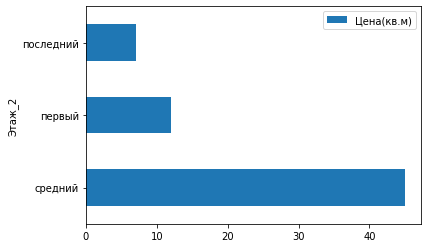

      Этаж_2  Цена(кв.м)
0    средний          45
1     первый          12
2  последний           7

Этажность_2


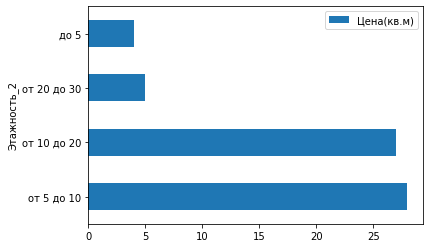

   Этажность_2  Цена(кв.м)
0   от 5 до 10          28
1  от 10 до 20          27
2  от 20 до 30           5
3         до 5           4

Ремонт_1


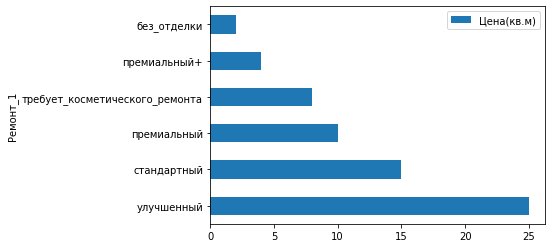

                         Ремонт_1  Цена(кв.м)
0                      улучшенный          25
1                     стандартный          15
2                     премиальный          10
3  требует_косметического_ремонта           8
4                    премиальный+           4
5                     без_отделки           2

Раст_центр_2


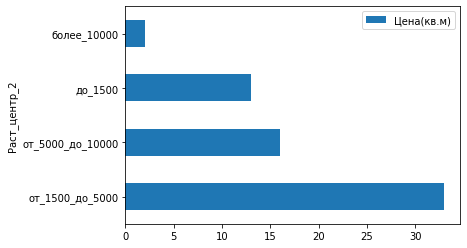

       Раст_центр_2  Цена(кв.м)
0   от_1500_до_5000          33
1  от_5000_до_10000          16
2           до_1500          13
3       более_10000           2

Раст_метро_2


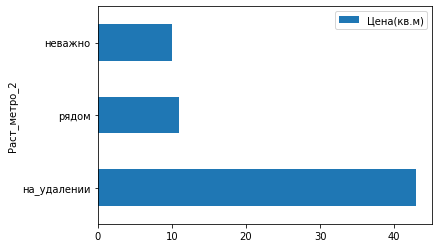

  Раст_метро_2  Цена(кв.м)
0  на_удалении          43
1        рядом          11
2      неважно          10



In [20]:
feauters = ['Этаж_2', 'Этажность_2', 'Ремонт_1', 'Раст_центр_2', 'Раст_метро_2']

for f in feauters:
    print(f)
    dff = df[(df['Комнатность'] == '5к и более')].groupby(f).agg({'Цена(кв.м)': 'count'}).sort_values('Цена(кв.м)', ascending=False).reset_index()
    ax = dff.plot.barh(x=f, y='Цена(кв.м)')
    plt.show()
    print(dff)#.sort_values(('Цена(кв.м)', 'median'))
    print()

Проверка отклонений в зависимости по ремонту

Комнатность


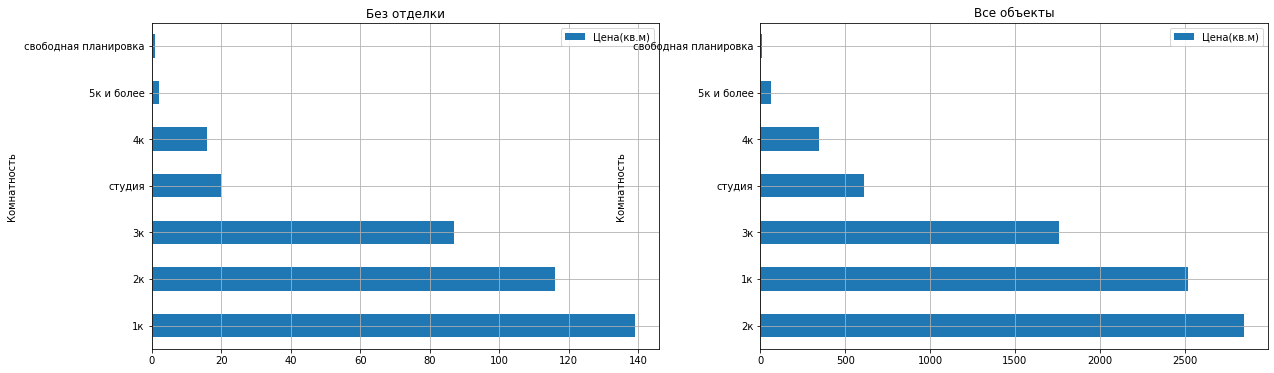

             Комнатность  Цена(кв.м)
0                     1к         139
1                     2к         116
2                     3к          87
3                 студия          20
4                     4к          16
5             5к и более           2
6   свободная планировка           1

Этаж_2


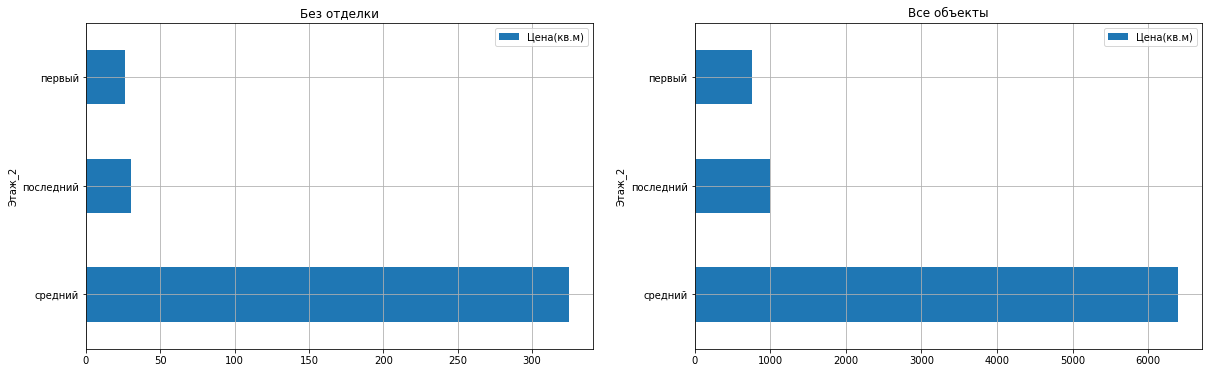

      Этаж_2  Цена(кв.м)
0    средний         325
1  последний          30
2     первый          26

Этажность_2


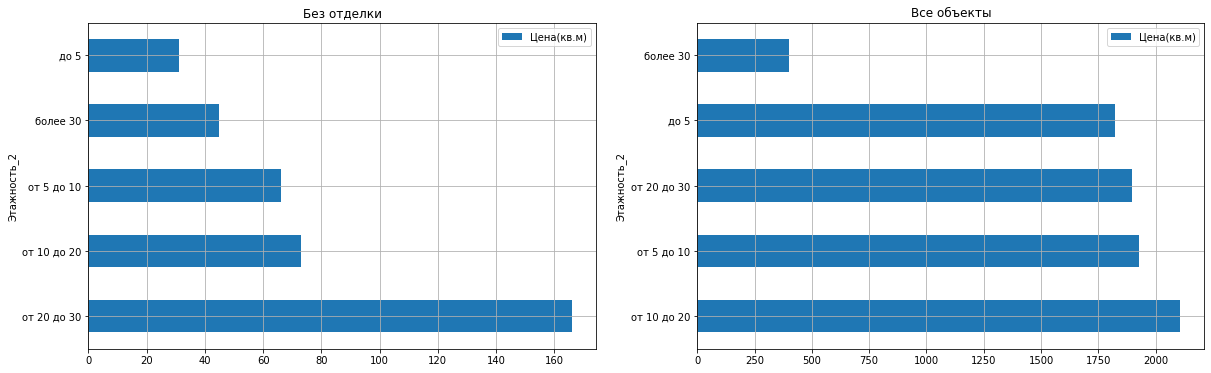

   Этажность_2  Цена(кв.м)
0  от 20 до 30         166
1  от 10 до 20          73
2   от 5 до 10          66
3     более 30          45
4         до 5          31

Раст_центр_2


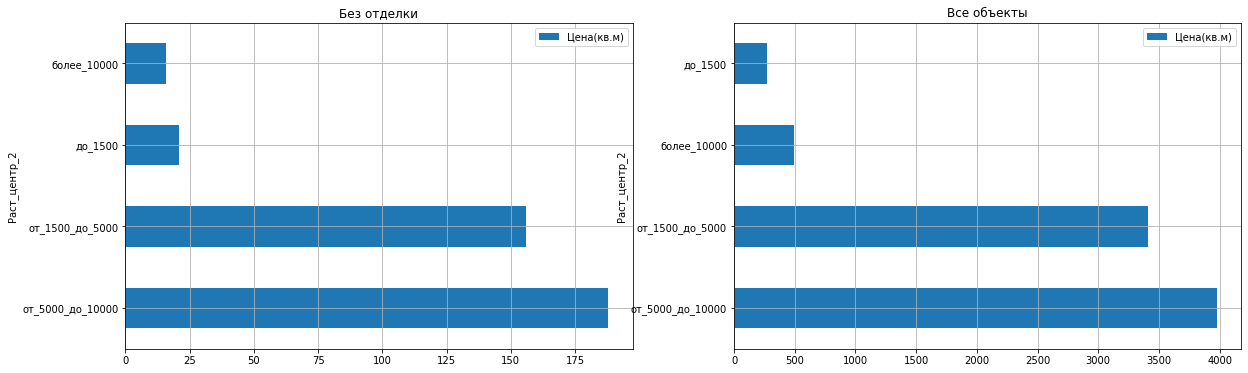

       Раст_центр_2  Цена(кв.м)
0  от_5000_до_10000         188
1   от_1500_до_5000         156
2           до_1500          21
3       более_10000          16

Раст_метро_2


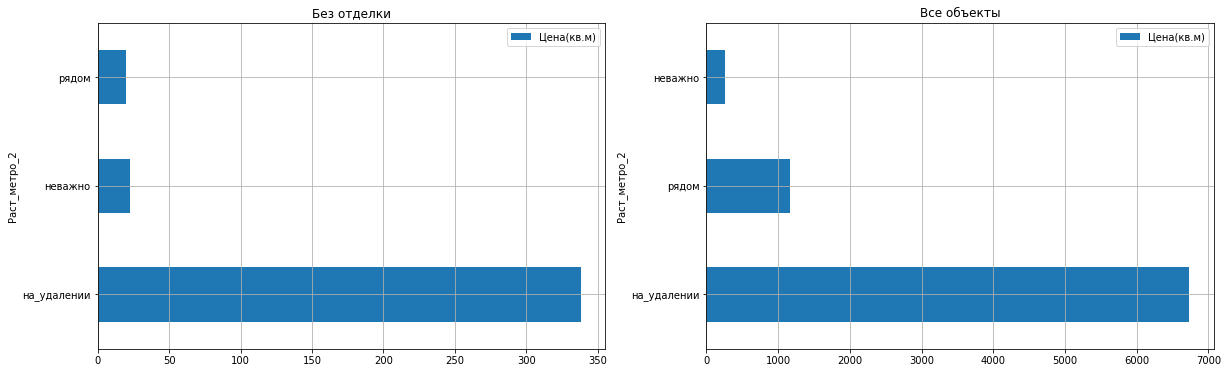

  Раст_метро_2  Цена(кв.м)
0  на_удалении         338
1      неважно          23
2        рядом          20



In [21]:
feauters = ['Комнатность', 'Этаж_2', 'Этажность_2', 'Раст_центр_2', 'Раст_метро_2']

for f in feauters:
    print(f)
    dff = df[(df['Ремонт_1'] == 'без_отделки')].groupby(f).agg({'Цена(кв.м)': 'count'}).sort_values('Цена(кв.м)', ascending=False).reset_index()
    
    fig, axes = plt.subplots(1,2, figsize=(20,6))
    dff.plot.barh(x=f, y='Цена(кв.м)', ax=axes[0], grid=True)
    axes[0].set_title('Без отделки')
    df.groupby(f).agg({'Цена(кв.м)': 'count'}).sort_values('Цена(кв.м)', ascending=False).reset_index().plot.barh(x=f, y='Цена(кв.м)', ax=axes[1], grid=True)
    axes[1].set_title('Все объекты')
    plt.show()
    print(dff)
    print()

Можно предположить, что влияние оказывает не сопоставимая развесовка в факторах, вошедших в выборку объектов

## Анализ групп схожих признаков

### Вид

In [22]:
views = ['Вид_1', 'Вид_2']

In [23]:
for v in views:
    display(df.groupby([v])['Цена(кв.м)'].median().sort_values(ascending=False))

Вид_1
есть    237331.0
нет     122222.0
Name: Цена(кв.м), dtype: float64

Вид_2
Пруд и Сити      243036.0
Водохранилище    178585.5
нет              122222.0
Name: Цена(кв.м), dtype: float64

In [24]:
view = pd.DataFrame(columns=[0,1,2,3])

In [25]:
i=0
for v in views:
    view = pd.DataFrame(np.insert(
        view.values, 
        i, 
        values=[
            v, 
            df.groupby([v])['Цена(кв.м)'].median().sort_values(ascending=False).reset_index().iloc[0][1],
            df.groupby([v])['Цена(кв.м)'].median().sort_values(ascending=False).reset_index().iloc[1][1],
            0
        ], 
        axis=0
    )
                       )
    i=+1

In [26]:
view.columns = ['вид','есть', 'нет', 'влияние']

In [27]:
view['влияние'] = view['есть'] / view['нет']

In [28]:
view

,вид,есть,нет,влияние
0,Вид_1,237331.0,122222.0,1.941803
1,Вид_2,243036.0,178585.5,1.360894


<AxesSubplot:xlabel='вид', ylabel='влияние'>

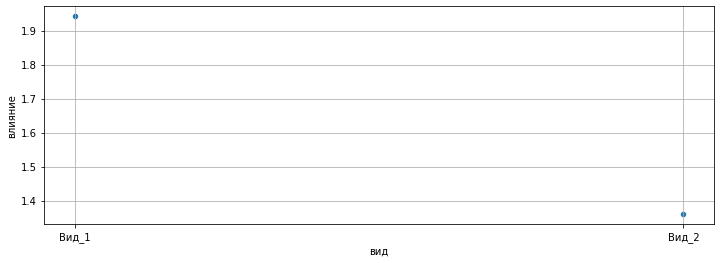

In [29]:
view.plot(kind='scatter', x='вид', y='влияние', grid=True, figsize=(12, 4),)

## Районы

### Районы 1

<AxesSubplot:xlabel='Цена(кв.м)', ylabel='Районы_1'>

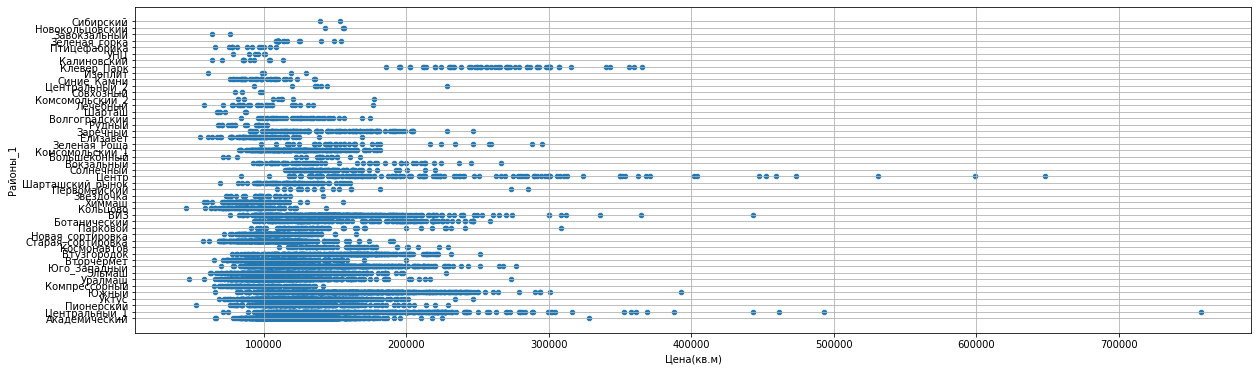

In [30]:
df.plot(kind='scatter', x='Цена(кв.м)', y='Районы_1', grid=True, figsize=(20, 6))

In [31]:
agg_func = {'Цена(кв.м)': ['median', 'count']}

In [32]:
df.groupby(['Районы_2']).agg(agg_func).sort_values(('Цена(кв.м)', 'median'), ascending=False)

Цена(кв.м)      
                                        median count
Районы_2                                            
Клевер_Парк                           262303.0    57
Центр                                 209720.0   125
Космонавтов                           157894.0    57
Зеленая_Роща                          156518.0    34
Втузгородок_Первомайский              156048.5   288
Центральный                           154044.0   361
Южный                                 152082.5   614
Ботанический                          148013.5   168
Заречный                              144230.0   111
ВИЗ_Большеконный                      141560.0   480
Солнечный                             137344.5    96
Парковой                              134249.0    59
Вокзальный                            131624.0    60
Юго_Западный                          130296.0   668
Волгоградский                         124390.0    41
Академический                         122905.0  1129
Уктус                                 122368.0   755
Пионерский                            121372.0   293
Комсомольский                         118292.0   222
Шарташский_рынок_Сибирский            116938.0    79
Эльмаш                                112348.0   425
Зеленая_горка                         110000.0    20
Уралмаш                               106787.5   522
Новая_сортировка                      105316.0   211
Старая_сортировка                     104867.5   428
Вторчермет_УНЦ_Совхозный              103233.0   325
Компрессорный_Лечебный_Птицефабрика    97645.0   152
Звездочка_Завокзальный                 97447.0    31
Синие_Камни                            96884.0    34
Елизавет_Рудный_Нижнеисетский          93570.5    86
Химмаш                                 90433.5   118
Кольцово_Новокольцовский               88888.0    83
Шарташ_Калиновский_Изоплит             87078.0    21

Во многих районах количество объетов недостаточно для установления зависимости.

In [33]:
districts = df.groupby(['Районы_1'])['Цена(кв.м)'].median().sort_values(ascending=False).index
districts

Index(['Клевер_Парк', 'Центр', 'Космонавтов', 'Втузгородок', 'Зеленая_Роща',
       'Центральный_1', 'Новокольцовский', 'Южный', 'Ботанический',
       'Сибирский', 'Заречный', 'ВИЗ', 'Первомайский', 'Большеконный',
       'Центральный_2', 'Солнечный', 'Парковой', 'Вокзальный', 'Юго_Западный',
       'Волгоградский', 'Академический', 'Уктус', 'Пионерский',
       'Комсомольский_1', 'Шарташский_рынок', 'Эльмаш', 'Комсомольский_2',
       'Зеленая_горка', 'Уралмаш', 'Новая_сортировка', 'Вторчермет',
       'Старая_сортировка', 'Изоплит', 'Компрессорный', 'Звездочка',
       'Лечебный', 'Синие_Камни', 'УНЦ', 'Елизавет', 'Совхозный', 'Химмаш',
       'Кольцово', 'Птицефабрика', 'Калиновский', 'Рудный', 'Шарташ',
       'Завокзальный'],
      dtype='object', name='Районы_1')

In [34]:
len(districts)

47

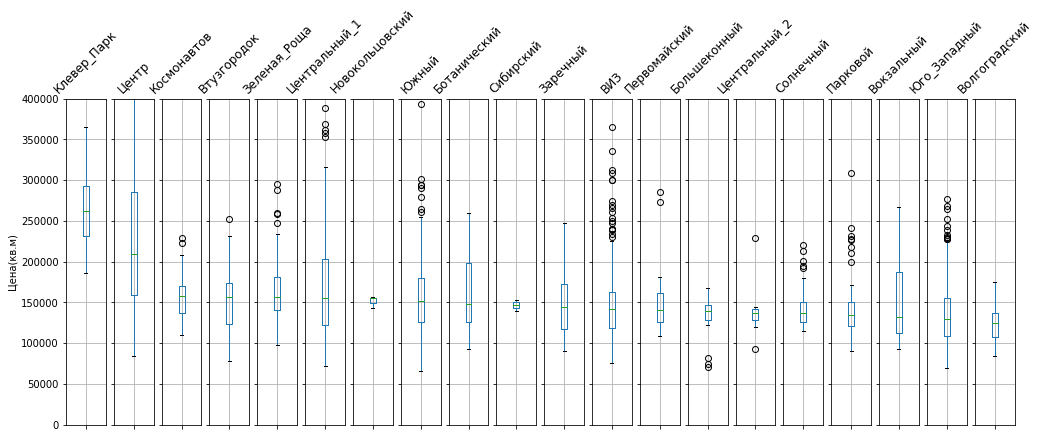

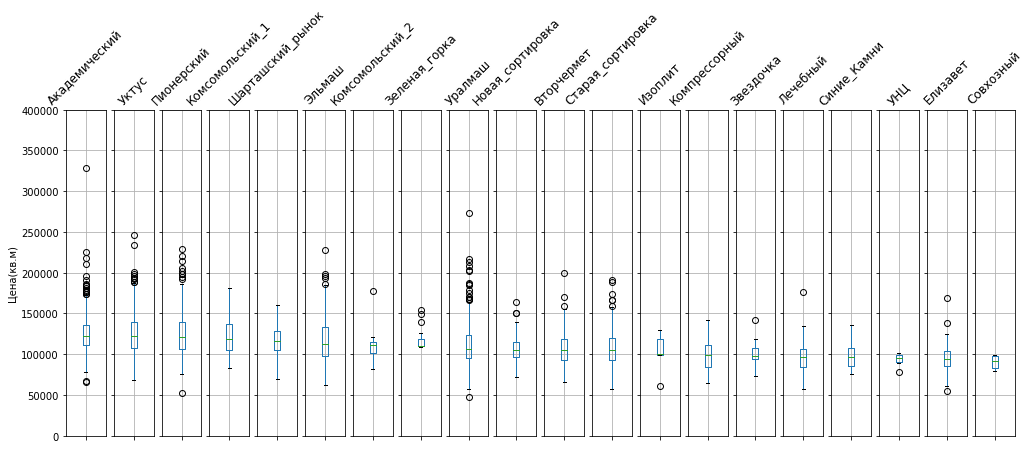

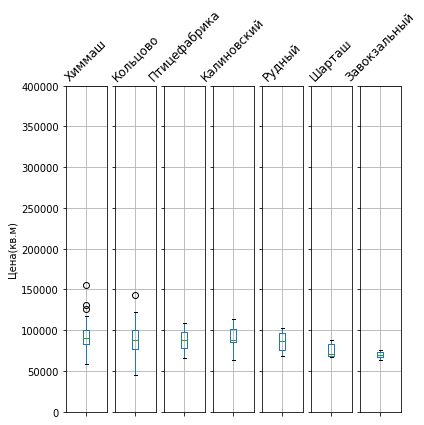

In [35]:
fig, axes = plt.subplots(1,20, figsize=(17,6))
i = 0
for dist in districts[0:20]:    
    df[df['Районы_1'] == dist].boxplot('Цена(кв.м)',ax=axes[i])
    axes[i].set_title(dist, rotation=45)
    axes[i].set_ylim([0, 400000])
    axes[i].set_xticklabels([])
    if i > 0:
        axes[i].set_yticklabels([])        
    if i == 0:
        axes[i].set_ylabel('Цена(кв.м)')
    i = i + 1
plt.show()
print()
fig, axes = plt.subplots(1,20, figsize=(17,6))
j = 0
for dist in districts[20:40]:    
    df[df['Районы_1'] == dist].boxplot('Цена(кв.м)',ax=axes[j])
    axes[j].set_title(dist, rotation=45)
    axes[j].set_ylim([0, 400000])
    axes[j].set_xticklabels([])
    if j > 0:
        axes[j].set_yticklabels([])        
    if j == 0:
        axes[j].set_ylabel('Цена(кв.м)')
    j = j + 1
plt.show()
print()
fig, axes = plt.subplots(1,7, figsize=(6,6))
z = 0
for dist in districts[40:47]:    
    df[df['Районы_1'] == dist].boxplot('Цена(кв.м)',ax=axes[z])
    axes[z].set_title(dist, rotation=45)
    axes[z].set_ylim([0, 400000])
    axes[z].set_xticklabels([])
    if z > 0:
        axes[z].set_yticklabels([])        
    if z == 0:
        axes[z].set_ylabel('Цена(кв.м)')
    z = z + 1
plt.show()

<AxesSubplot:xlabel='Цена(кв.м)', ylabel='Районы_2'>

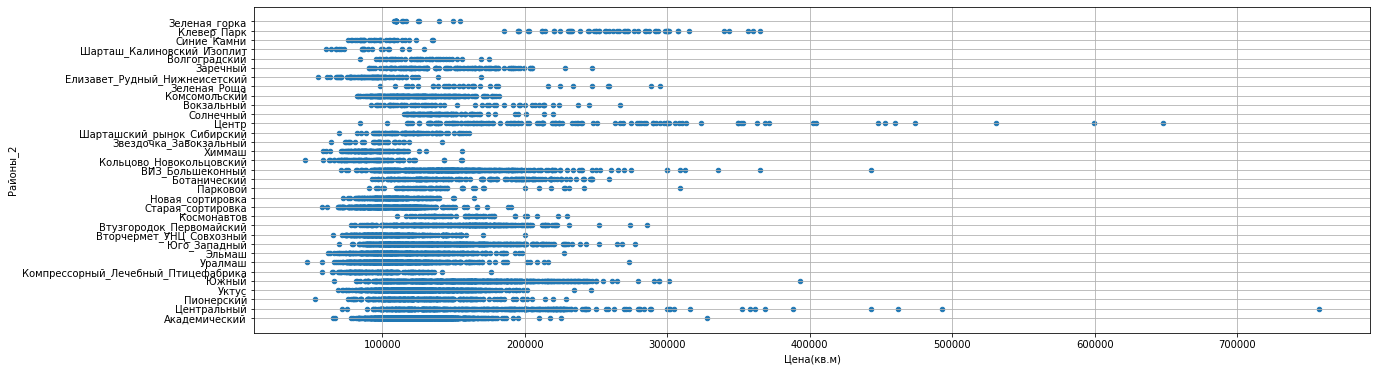

In [36]:
df.plot(kind='scatter', x='Цена(кв.м)', y='Районы_2', grid=True, figsize=(20, 6))

### Районы 2

In [37]:
df.groupby(['Районы_2'])['Цена(кв.м)'].median().sort_values(ascending=False)

Районы_2
Клевер_Парк                            262303.0
Центр                                  209720.0
Космонавтов                            157894.0
Зеленая_Роща                           156518.0
Втузгородок_Первомайский               156048.5
Центральный                            154044.0
Южный                                  152082.5
Ботанический                           148013.5
Заречный                               144230.0
ВИЗ_Большеконный                       141560.0
Солнечный                              137344.5
Парковой                               134249.0
Вокзальный                             131624.0
Юго_Западный                           130296.0
Волгоградский                          124390.0
Академический                          122905.0
Уктус                                  122368.0
Пионерский                             121372.0
Комсомольский                          118292.0
Шарташский_рынок_Сибирский             116938.0
Эльмаш                         

In [38]:
districts2 = df.groupby(['Районы_2'])['Цена(кв.м)'].median().sort_values(ascending=False).index
districts2

Index(['Клевер_Парк', 'Центр', 'Космонавтов', 'Зеленая_Роща',
       'Втузгородок_Первомайский', 'Центральный', 'Южный', 'Ботанический',
       'Заречный', 'ВИЗ_Большеконный', 'Солнечный', 'Парковой', 'Вокзальный',
       'Юго_Западный', 'Волгоградский', 'Академический', 'Уктус', 'Пионерский',
       'Комсомольский', 'Шарташский_рынок_Сибирский', 'Эльмаш',
       'Зеленая_горка', 'Уралмаш', 'Новая_сортировка', 'Старая_сортировка',
       'Вторчермет_УНЦ_Совхозный', 'Компрессорный_Лечебный_Птицефабрика',
       'Звездочка_Завокзальный', 'Синие_Камни',
       'Елизавет_Рудный_Нижнеисетский', 'Химмаш', 'Кольцово_Новокольцовский',
       'Шарташ_Калиновский_Изоплит'],
      dtype='object', name='Районы_2')

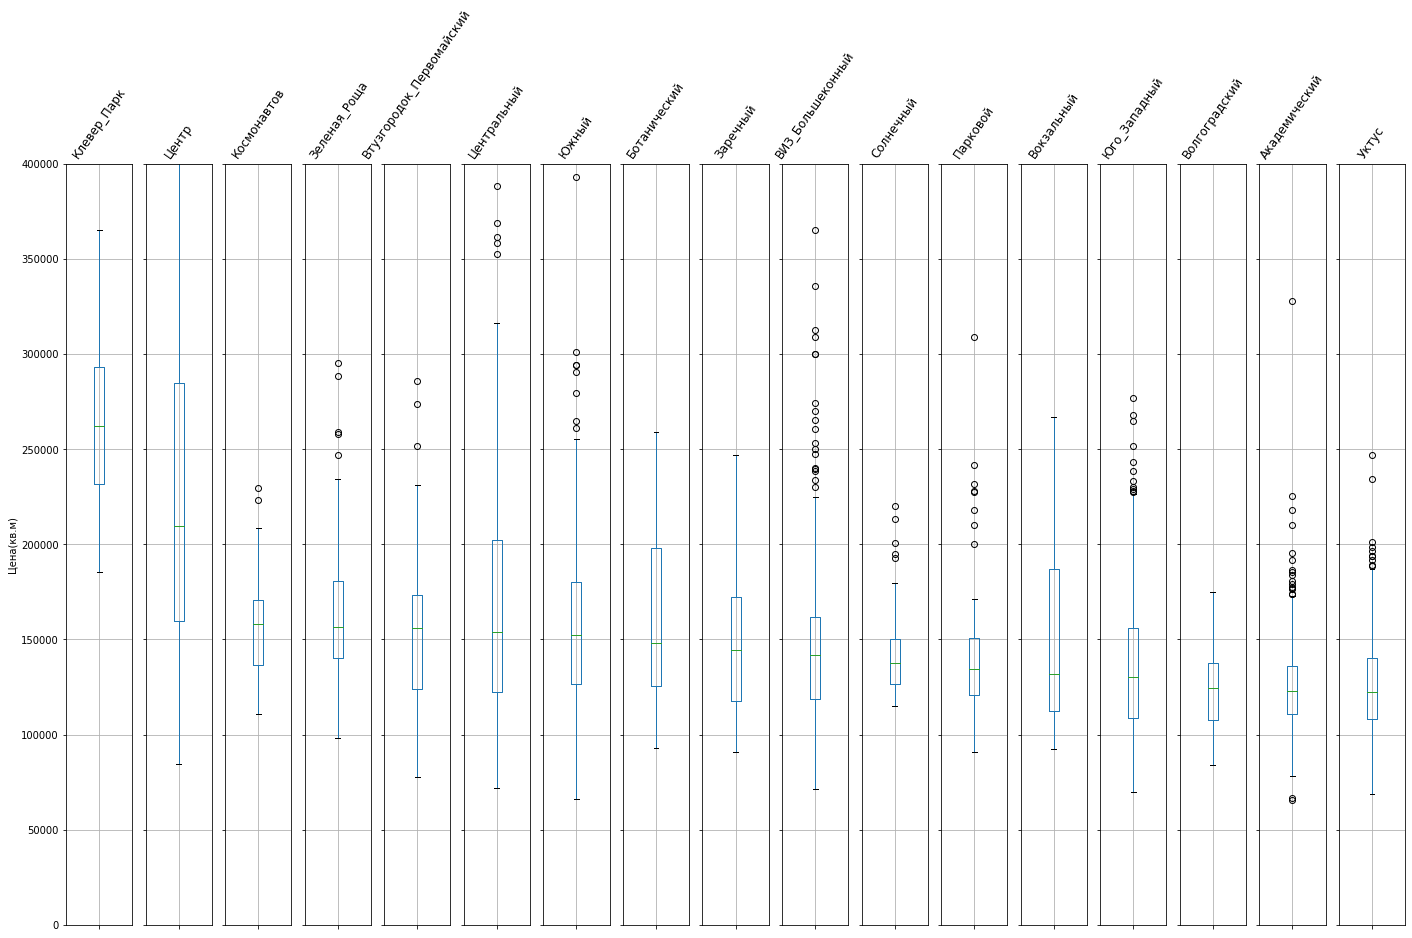

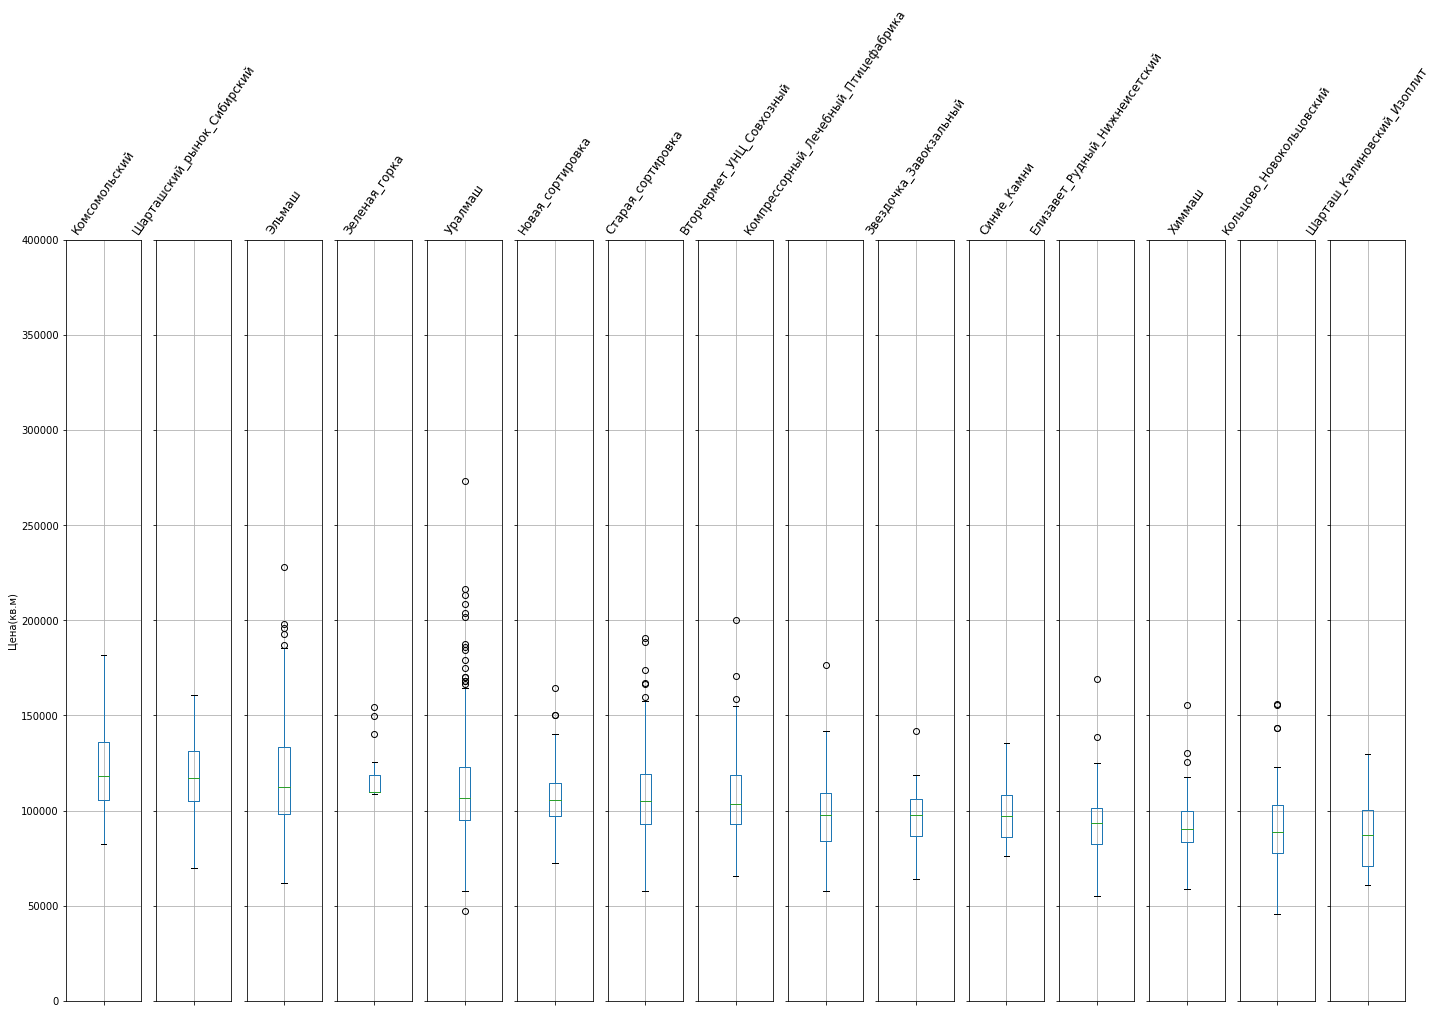

In [39]:
fig, axes = plt.subplots(1,17, figsize=(24,14))
i = 0
for dist in districts2[0:17]:    
    df[df['Районы_2'] == dist].boxplot('Цена(кв.м)',ax=axes[i])
    axes[i].set_title(dist, rotation=55)
    axes[i].set_ylim([0, 400000])
    axes[i].set_xticklabels([])
    if i > 0:
        axes[i].set_yticklabels([])        
    if i == 0:
        axes[i].set_ylabel('Цена(кв.м)')
    i = i + 1
plt.show()
print()
fig, axes = plt.subplots(1,15, figsize=(24,14))
j = 0
for dist in districts2[18:34]:    
    df[df['Районы_2'] == dist].boxplot('Цена(кв.м)',ax=axes[j])
    axes[j].set_title(dist, rotation=55)
    axes[j].set_ylim([0, 400000])
    axes[j].set_xticklabels([])
    if j > 0:
        axes[j].set_yticklabels([])        
    if j == 0:
        axes[j].set_ylabel('Цена(кв.м)')
    j = j + 1
plt.show()

Анализ районов с выбросами

ВИЗ_Большеконный


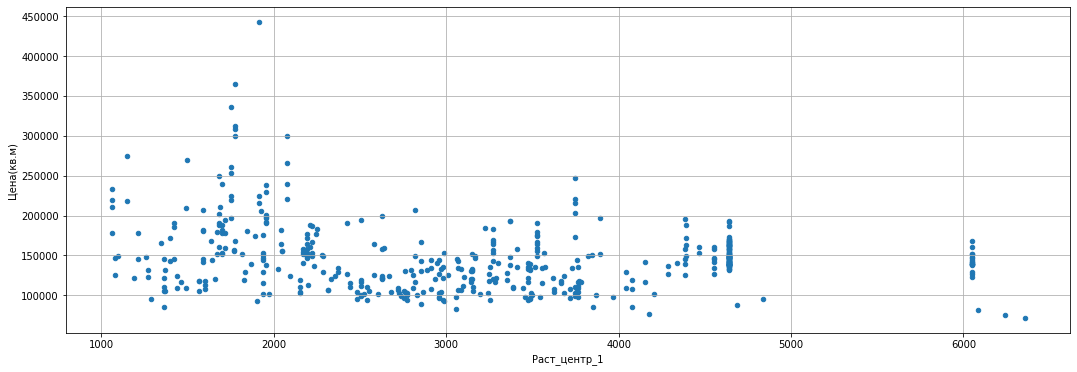


Юго_Западный


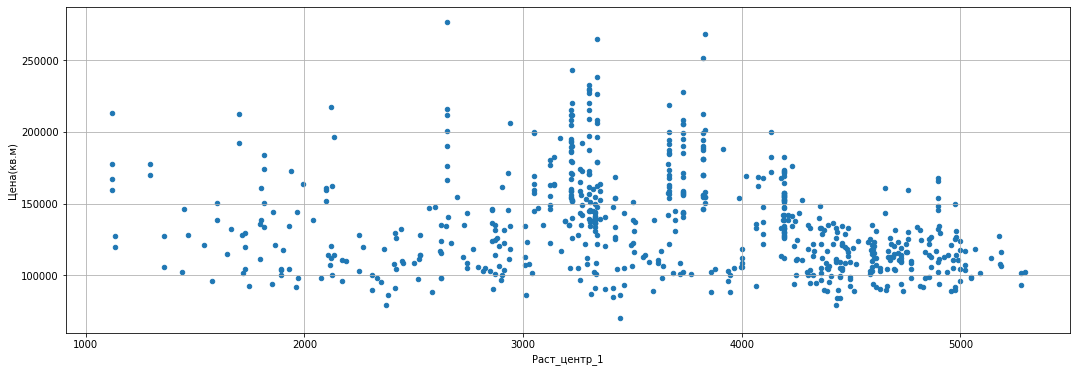


Центральный


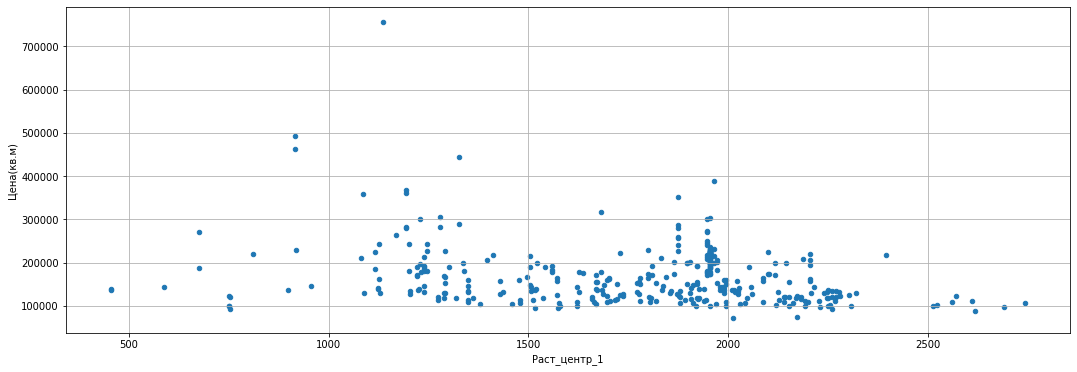


Южный


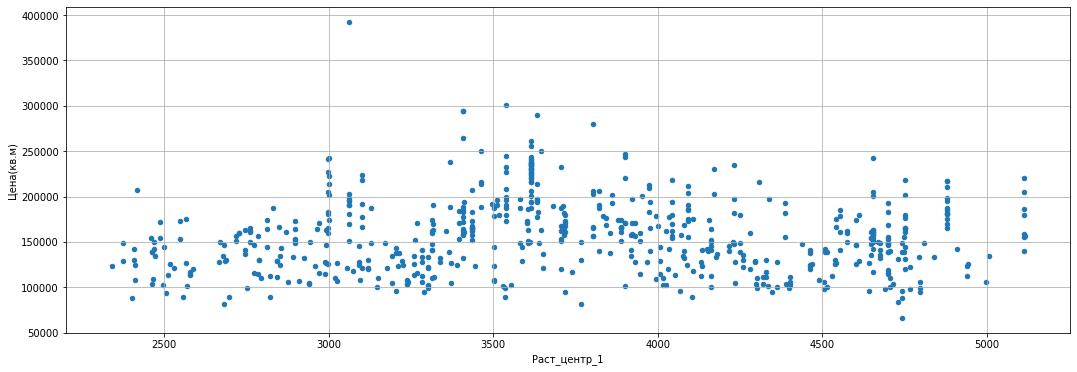

In [40]:
an_dist = ['ВИЗ_Большеконный', 'Юго_Западный', 'Центральный', 'Южный']
for dist in an_dist:
    print(dist)
    report = df[df['Районы_2'] == dist]
    report.plot.scatter(x='Раст_центр_1', y='Цена(кв.м)',  grid=True, figsize=(18, 6), )
    plt.show()
    print()

Нет выраженных групп в районах по фактору цена-расстояние до центра, кроме ВИЗ (группа до 2000 м).

ВИЗ_Большеконный


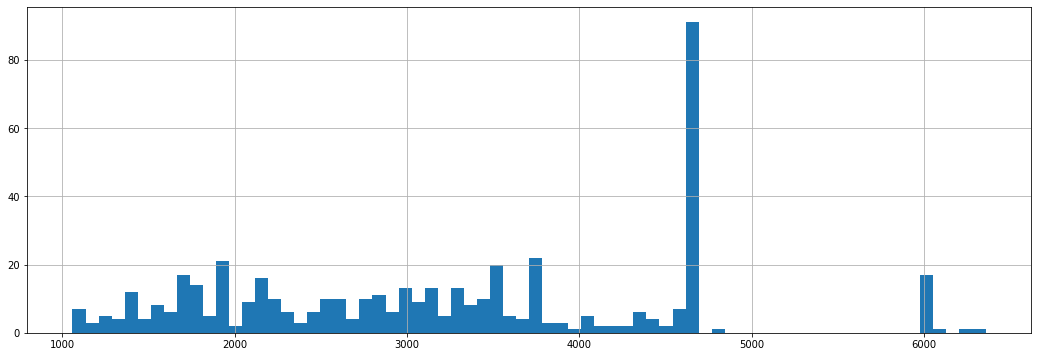


Юго_Западный


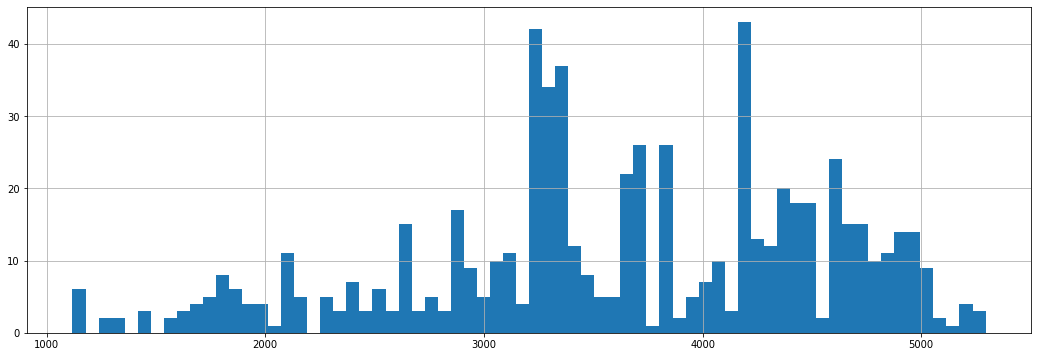


Центральный


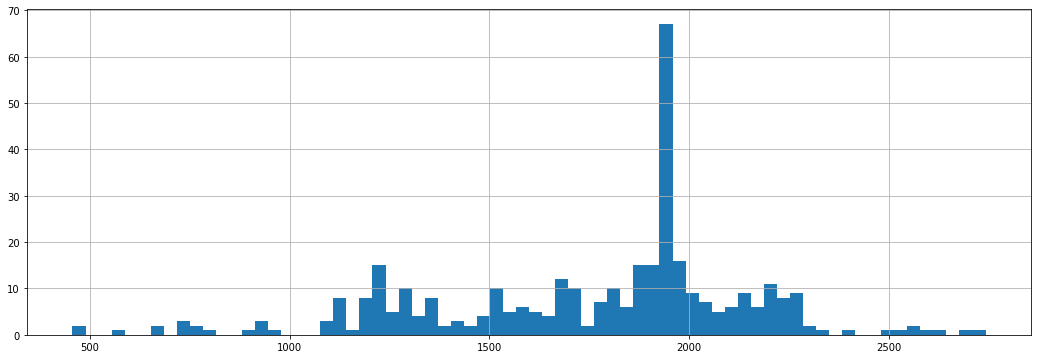


Южный


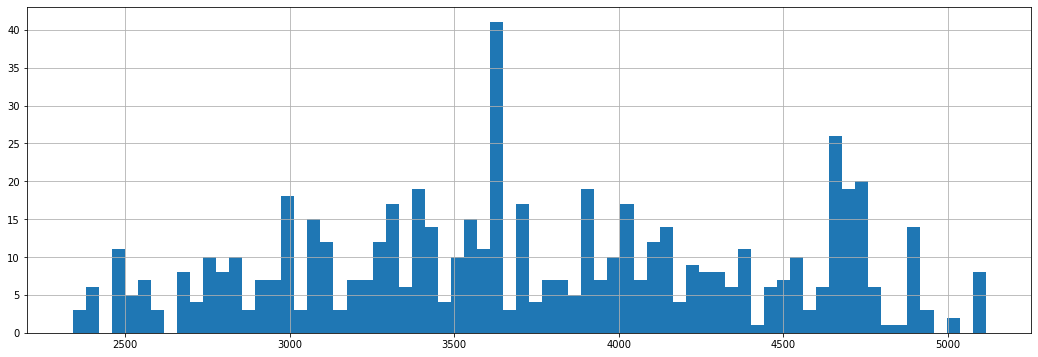

In [41]:
for dist in an_dist:
    print(dist)
    report = df[df['Районы_2'] == dist]
    report['Раст_центр_1'].hist(bins=70, figsize=(18, 6))
    plt.show()
    print()

Нет выраженных анклавов, кроме ВИЗ (более 6000 м)

### Ремонт

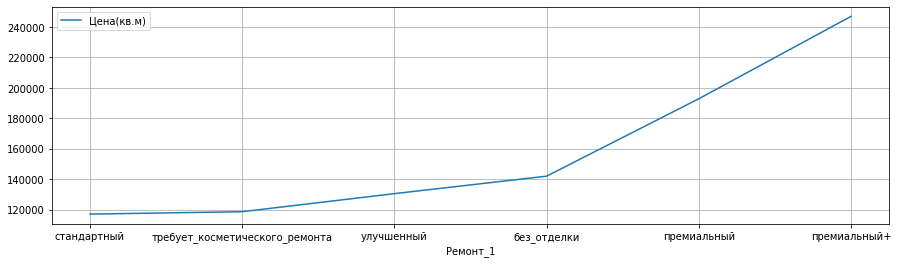

In [42]:
report = df.groupby('Ремонт_1').agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
report.plot(kind='line',  grid=True, figsize=(15, 4), )
plt.show()

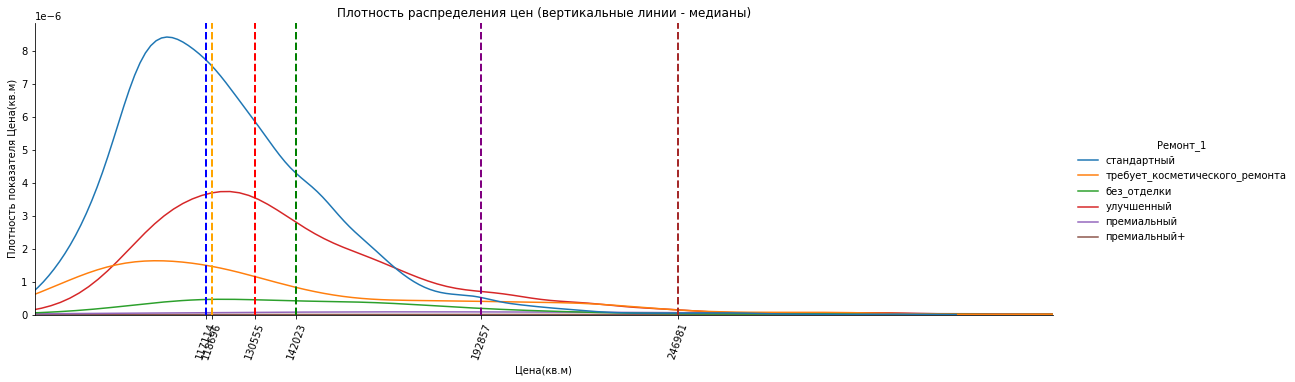

In [43]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Ремонт_1',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Цена(кв.м)'
)
g.refline(x = df[df['Ремонт_1'] == 'стандартный']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
g.refline(x = df[df['Ремонт_1'] == 'без_отделки']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Ремонт_1'] == 'требует_косметического_ремонта']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g.refline(x = df[df['Ремонт_1'] == 'премиальный']['Цена(кв.м)'].median(), color = 'purple', lw = 2)
g.refline(x = df[df['Ремонт_1'] == 'премиальный+']['Цена(кв.м)'].median(), color = 'brown', lw = 2)
g.refline(x = df[df['Ремонт_1'] == 'улучшенный']['Цена(кв.м)'].median(), color = 'red', lw = 2)
plt.xticks(
    [
        df[df['Ремонт_1'] == 'стандартный']['Цена(кв.м)'].median(), 
        df[df['Ремонт_1'] == 'без_отделки']['Цена(кв.м)'].median(),
        df[df['Ремонт_1'] == 'требует_косметического_ремонта']['Цена(кв.м)'].median(),
        df[df['Ремонт_1'] == 'премиальный']['Цена(кв.м)'].median(),
        df[df['Ремонт_1'] == 'премиальный+']['Цена(кв.м)'].median(),        
        df[df['Ремонт_1'] == 'улучшенный']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Ремонт_1'] == 'стандартный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_1'] == 'без_отделки']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_1'] == 'требует_косметического_ремонта']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_1'] == 'премиальный']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_1'] == 'премиальный+']['Цена(кв.м)'].median()),
        int(df[df['Ремонт_1'] == 'улучшенный']['Цена(кв.м)'].median()),
    ],
    rotation = 70
)
g.set(xlim=(70000,350000))

Есть аномалии. Видимо связаны с пересечением влияния факторов ремонт-гп-престижность.

### Этаж

Этаж_1


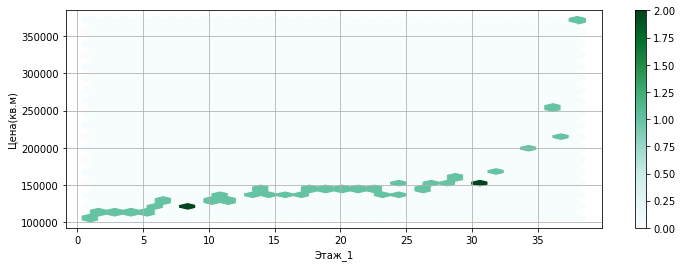

Корреляция цены от Этаж_1: 72.05%

Этажность_1


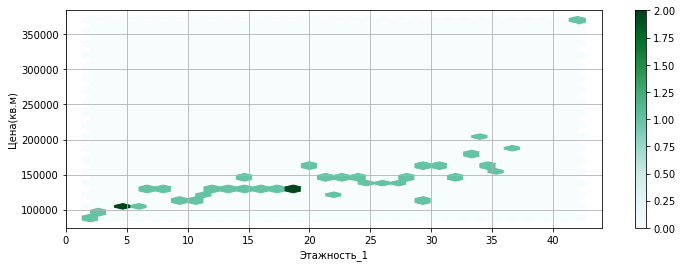

Корреляция цены от Этажность_1: 70.37%



In [44]:
parametrs = ['Этаж_1', 'Этажность_1']

for description in parametrs:
    print(description)
    df_g = df.groupby(description).agg({'Цена(кв.м)': 'median'})
    df_g[description] = df_g.index
    df_g.plot(x=description, y='Цена(кв.м)', kind='hexbin', grid=True, figsize=(12, 4), gridsize=30, sharex=False, )
    plt.show()
    print('Корреляция цены от {}: {:.2%}'.format(description, df_g['Цена(кв.м)'].corr(df_g[description])))
    print()

Этаж_2


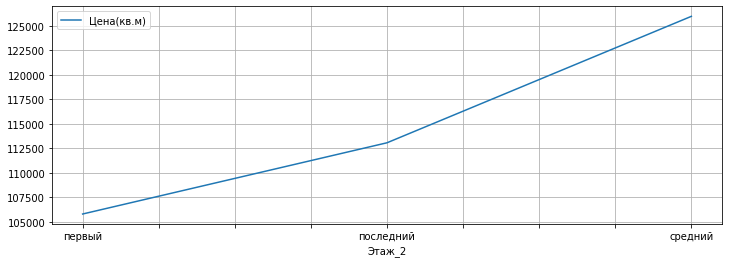


Этаж_3


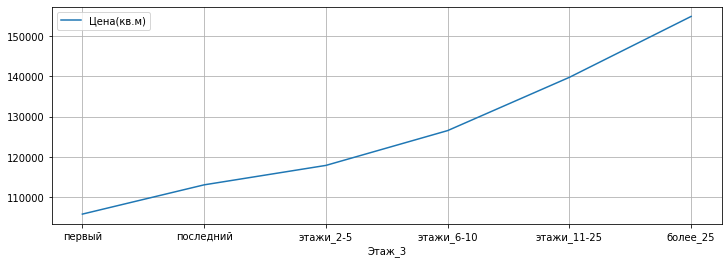


Этаж_4


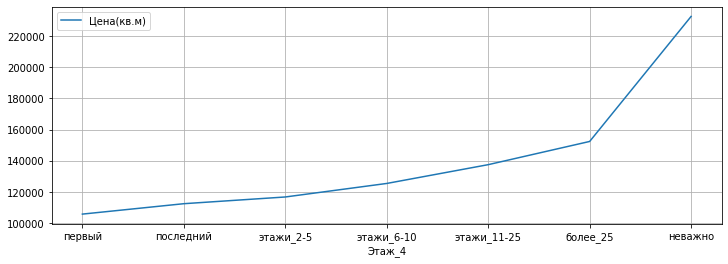


Этажность_2


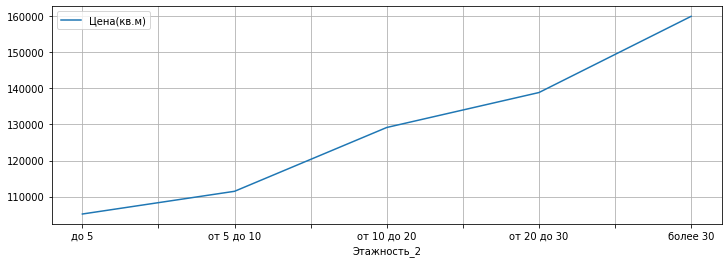

In [45]:
parametrs = ['Этаж_2', 'Этаж_3', 'Этаж_4', 'Этажность_2']

for description in parametrs:
    print(description)
    report = df.groupby(description).agg({'Цена(кв.м)': 'median'}).sort_values(['Цена(кв.м)'])
    report.plot(kind='line',  grid=True, figsize=(12, 4), )
    plt.show()
    print()

In [46]:
df.groupby(['Этаж_2'])['ID'].count()

Этаж_2
первый        764
последний     996
средний      6393
Name: ID, dtype: int64

### Проверка зависимости цена-группа_этаж в зависимости от этажности 

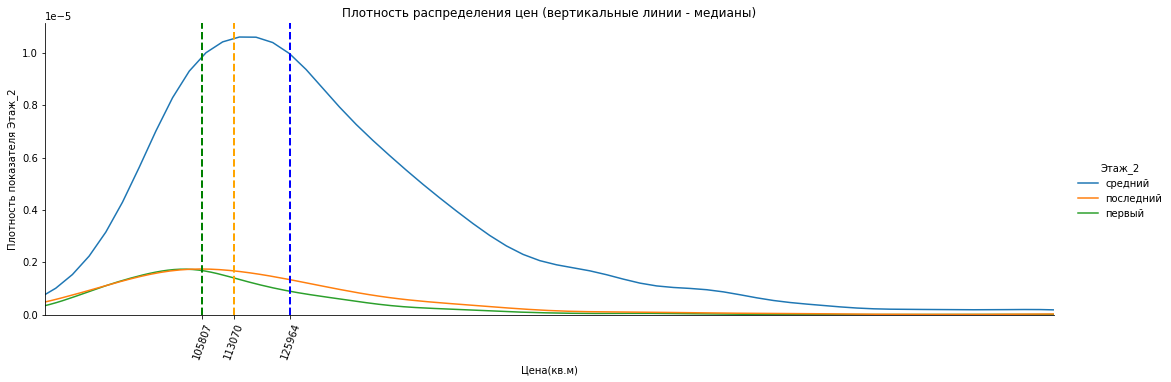

In [47]:
g = sns.displot(
    data = df,
    x = 'Цена(кв.м)',
    hue = 'Этаж_2',
    kind = 'kde',
    height = 5,
    aspect = 3
).set(
    title = 'Плотность распределения цен (вертикальные линии - медианы)', 
    ylabel = 'Плотность показателя Этаж_2'
)
g.refline(x = df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median(), color = 'green', lw = 2)
g.refline(x = df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median(), color = 'orange', lw = 2)
g.refline(x = df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median(), color = 'blue', lw = 2)
plt.xticks(
    [
        df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median(), 
        df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median(),
        df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median(),
    ],
    [
        int(df[df['Этаж_2'] == 'первый']['Цена(кв.м)'].median()),
        int(df[df['Этаж_2'] == 'последний']['Цена(кв.м)'].median()),
        int(df[df['Этаж_2'] == 'средний']['Цена(кв.м)'].median()),
    ],
    rotation = 70
)
g.set(xlim=(70000,300000))

In [48]:
df['Этаж_4'].value_counts()

этажи_2-5      2740
этажи_6-10     1711
этажи_11-25    1632
последний       982
первый          763
неважно         256
более_25         69
Name: Этаж_4, dtype: int64

до 5


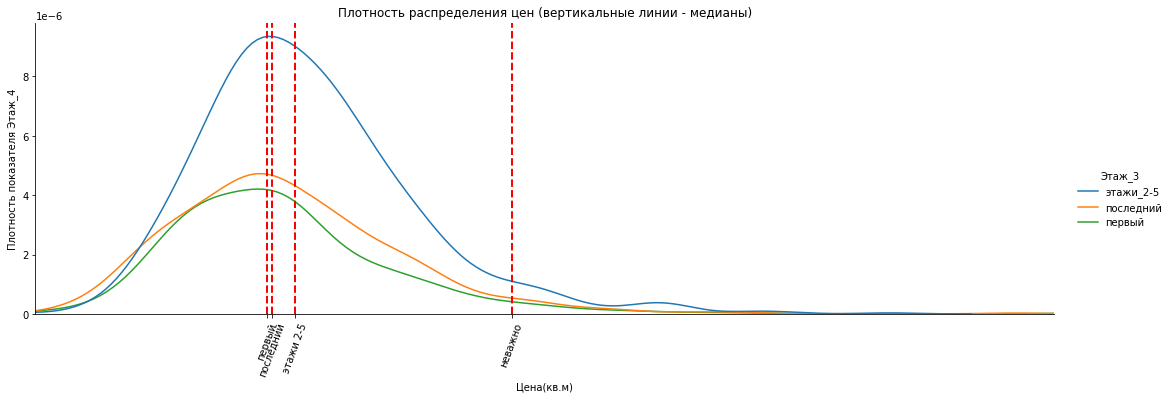


от 5 до 10


/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  if sys.path[0] == '':


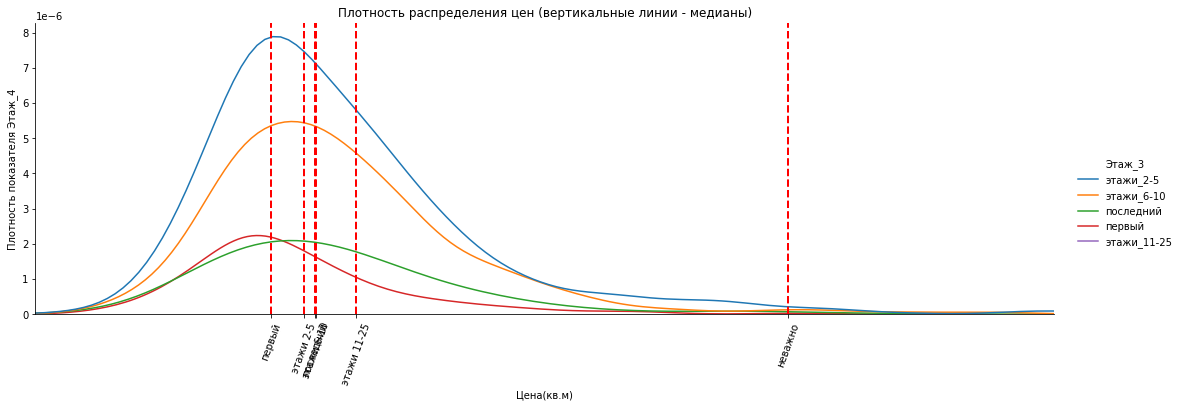


от 10 до 20


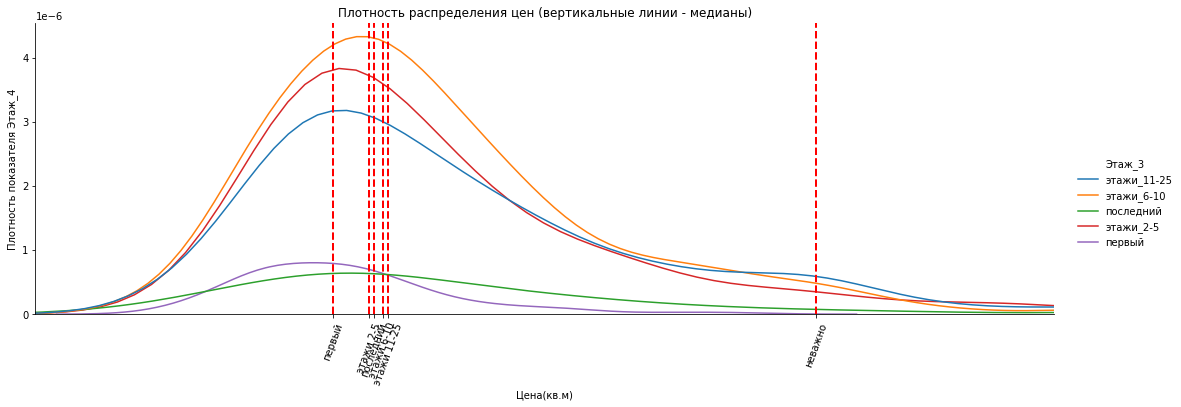


от 20 до 30


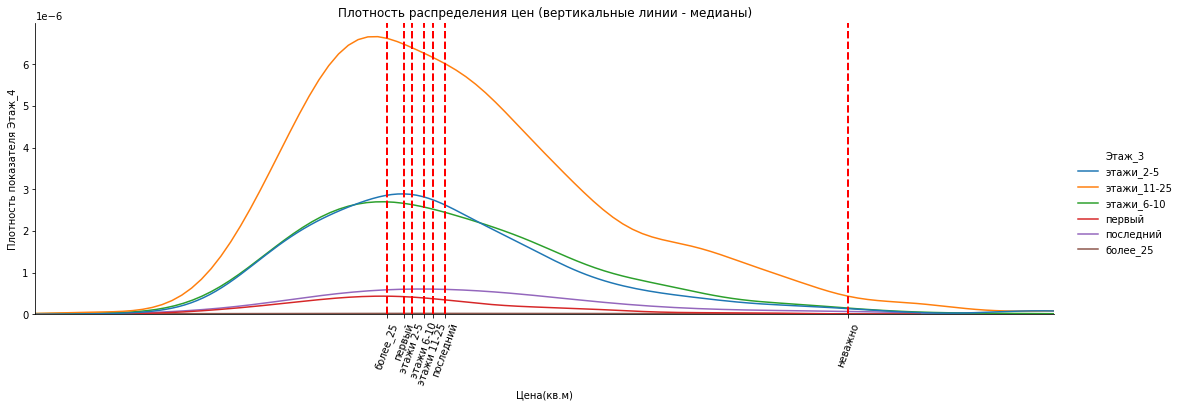


более 30


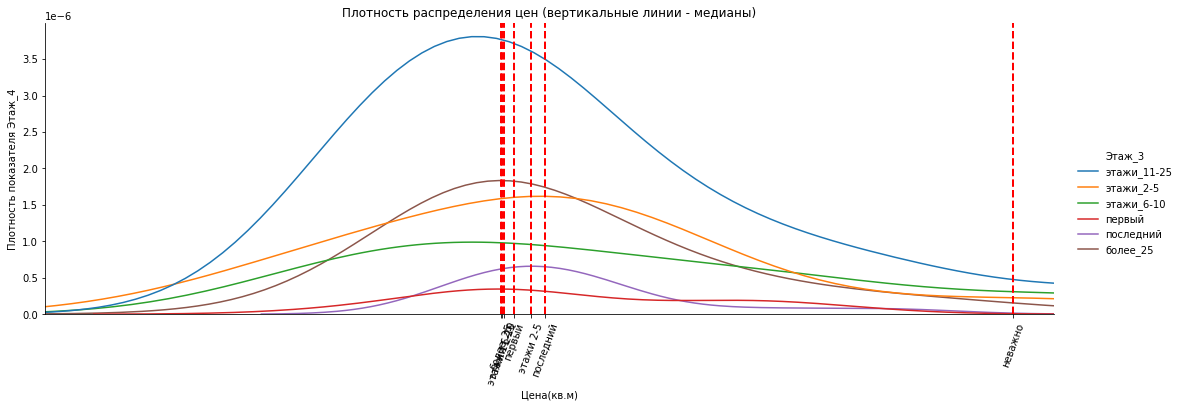

In [49]:
params = ['до 5', 'от 5 до 10', 'от 10 до 20', 'от 20 до 30', 'более 30']

for param in params:
    df_e = df[df['Этажность_2'] == param]
    print(param)
    g = sns.displot(
        data = df_e,
        x = 'Цена(кв.м)',
        hue = 'Этаж_3',
        kind = 'kde',
        height = 5,
        aspect = 3
    ).set(
        title = 'Плотность распределения цен (вертикальные линии - медианы)', 
        ylabel = 'Плотность показателя Этаж_4'
    )
    g.refline(x = df_e[df_e['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'последний']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи_11-25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи_2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'этажи_6-10']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'более_25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    plt.xticks(
        [
            df_e[df_e['Этаж_4'] == 'первый']['Цена(кв.м)'].median(), 
            df_e[df_e['Этаж_4'] == 'последний']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи_11-25']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи_2-5']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'этажи_6-10']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'более_25']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_4'] == 'неважно']['Цена(кв.м)'].median(),
        ],
        [
            'первый',
            'последний',
            'этажи 11-25',
            'этажи 2-5',
            'этажи 6-10',
            'более_25',
            'неважно'
        ],
        rotation = 70
    )
    g.set(xlim=(50000,280000))
    plt.show()
    print()

до 5


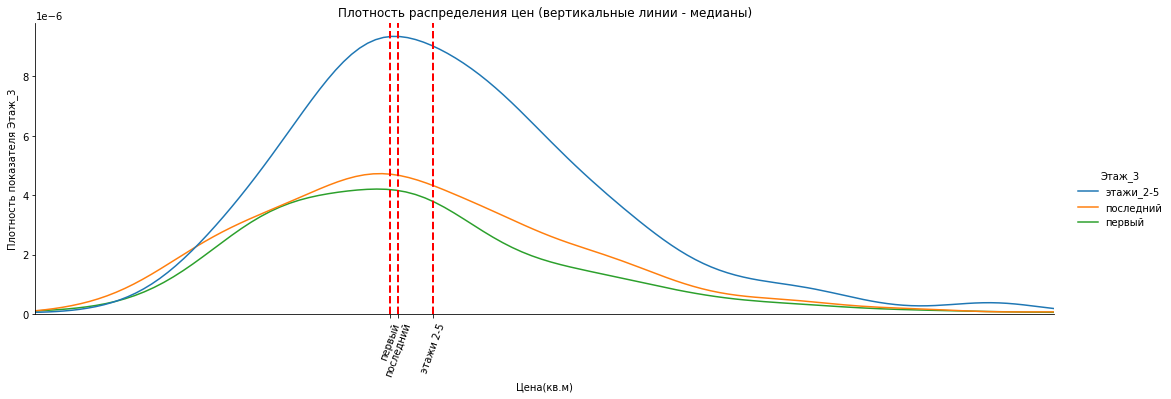


от 5 до 10


/opt/conda/python37/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  if sys.path[0] == '':


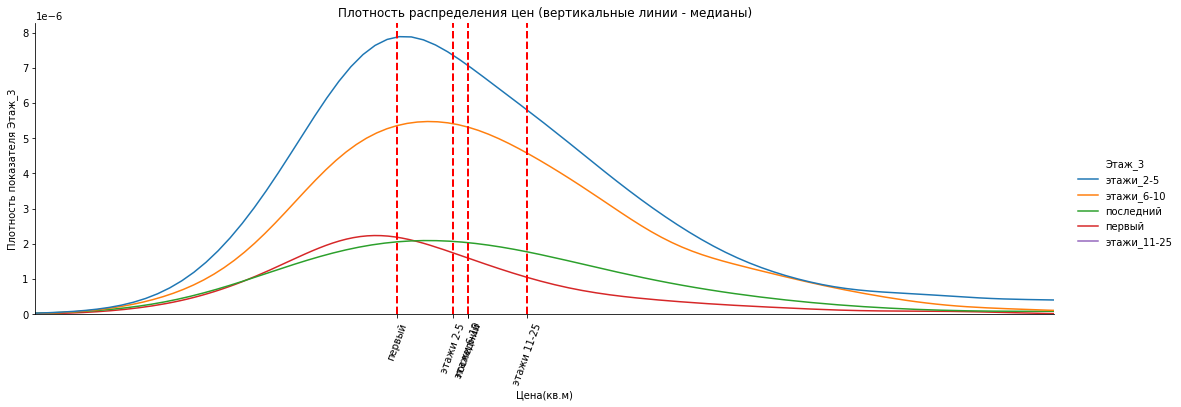


от 10 до 20


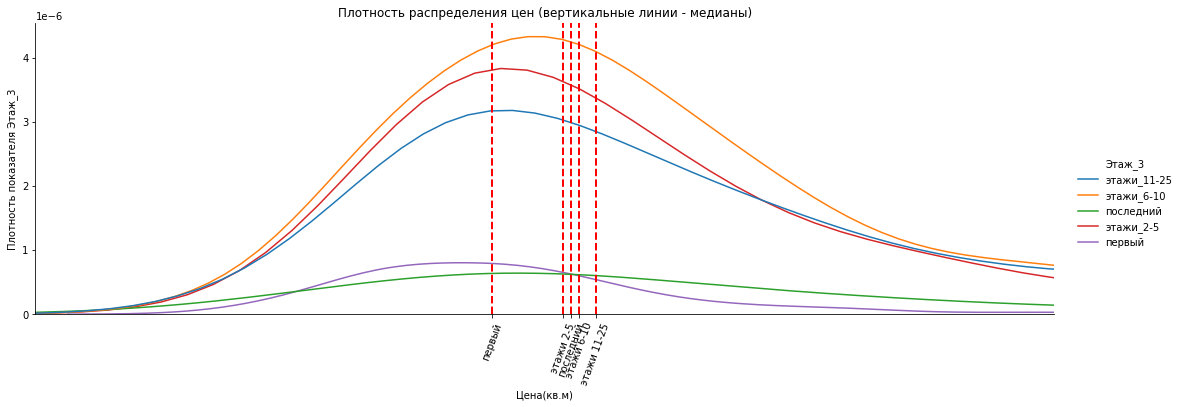


от 20 до 30


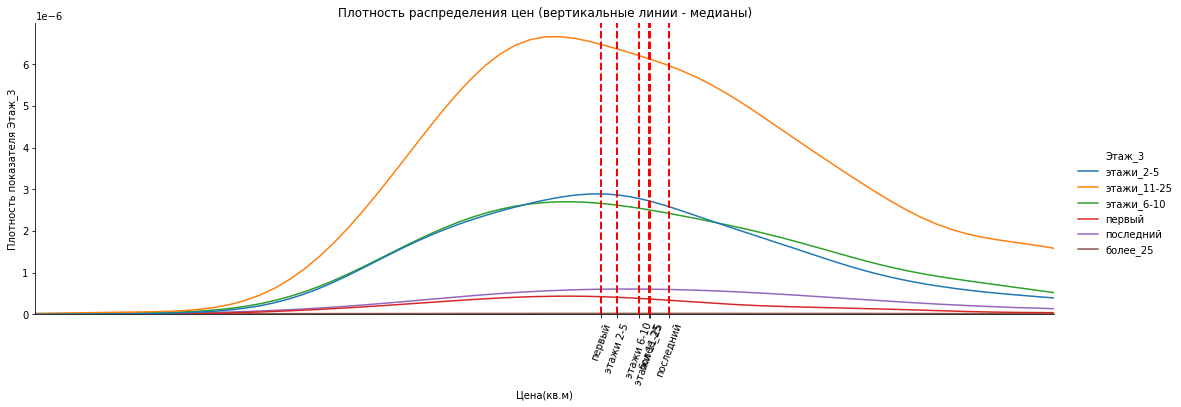


более 30


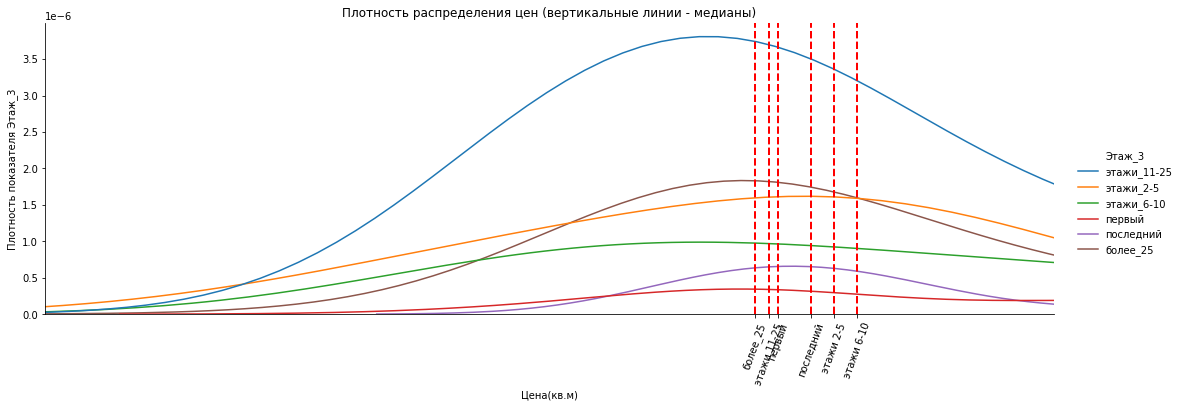

In [50]:
params = ['до 5', 'от 5 до 10', 'от 10 до 20', 'от 20 до 30', 'более 30']

for param in params:
    df_e = df[df['Этажность_2'] == param]
    print(param)
    g = sns.displot(
        data = df_e,
        x = 'Цена(кв.м)',
        hue = 'Этаж_3',
        kind = 'kde',
        height = 5,
        aspect = 3
    ).set(
        title = 'Плотность распределения цен (вертикальные линии - медианы)', 
        ylabel = 'Плотность показателя Этаж_3'
    )
    g.refline(x = df_e[df_e['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'последний']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи_11-25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи_2-5']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'этажи_6-10']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    g.refline(x = df_e[df_e['Этаж_3'] == 'более_25']['Цена(кв.м)'].median(), color = 'red', lw = 2)
    plt.xticks(
        [
            df_e[df_e['Этаж_3'] == 'первый']['Цена(кв.м)'].median(), 
            df_e[df_e['Этаж_3'] == 'последний']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи_11-25']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи_2-5']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'этажи_6-10']['Цена(кв.м)'].median(),
            df_e[df_e['Этаж_3'] == 'более_25']['Цена(кв.м)'].median(),            
        ],
        [
            'первый',
            'последний',
            'этажи 11-25',
            'этажи 2-5',
            'этажи 6-10',
            'более_25',            
        ],
        rotation = 70
    )
    g.set(xlim=(50000,200000))
    plt.show()
    print()

Нетипичные распределения для высотных зданий

## Взаимное влияние признаков

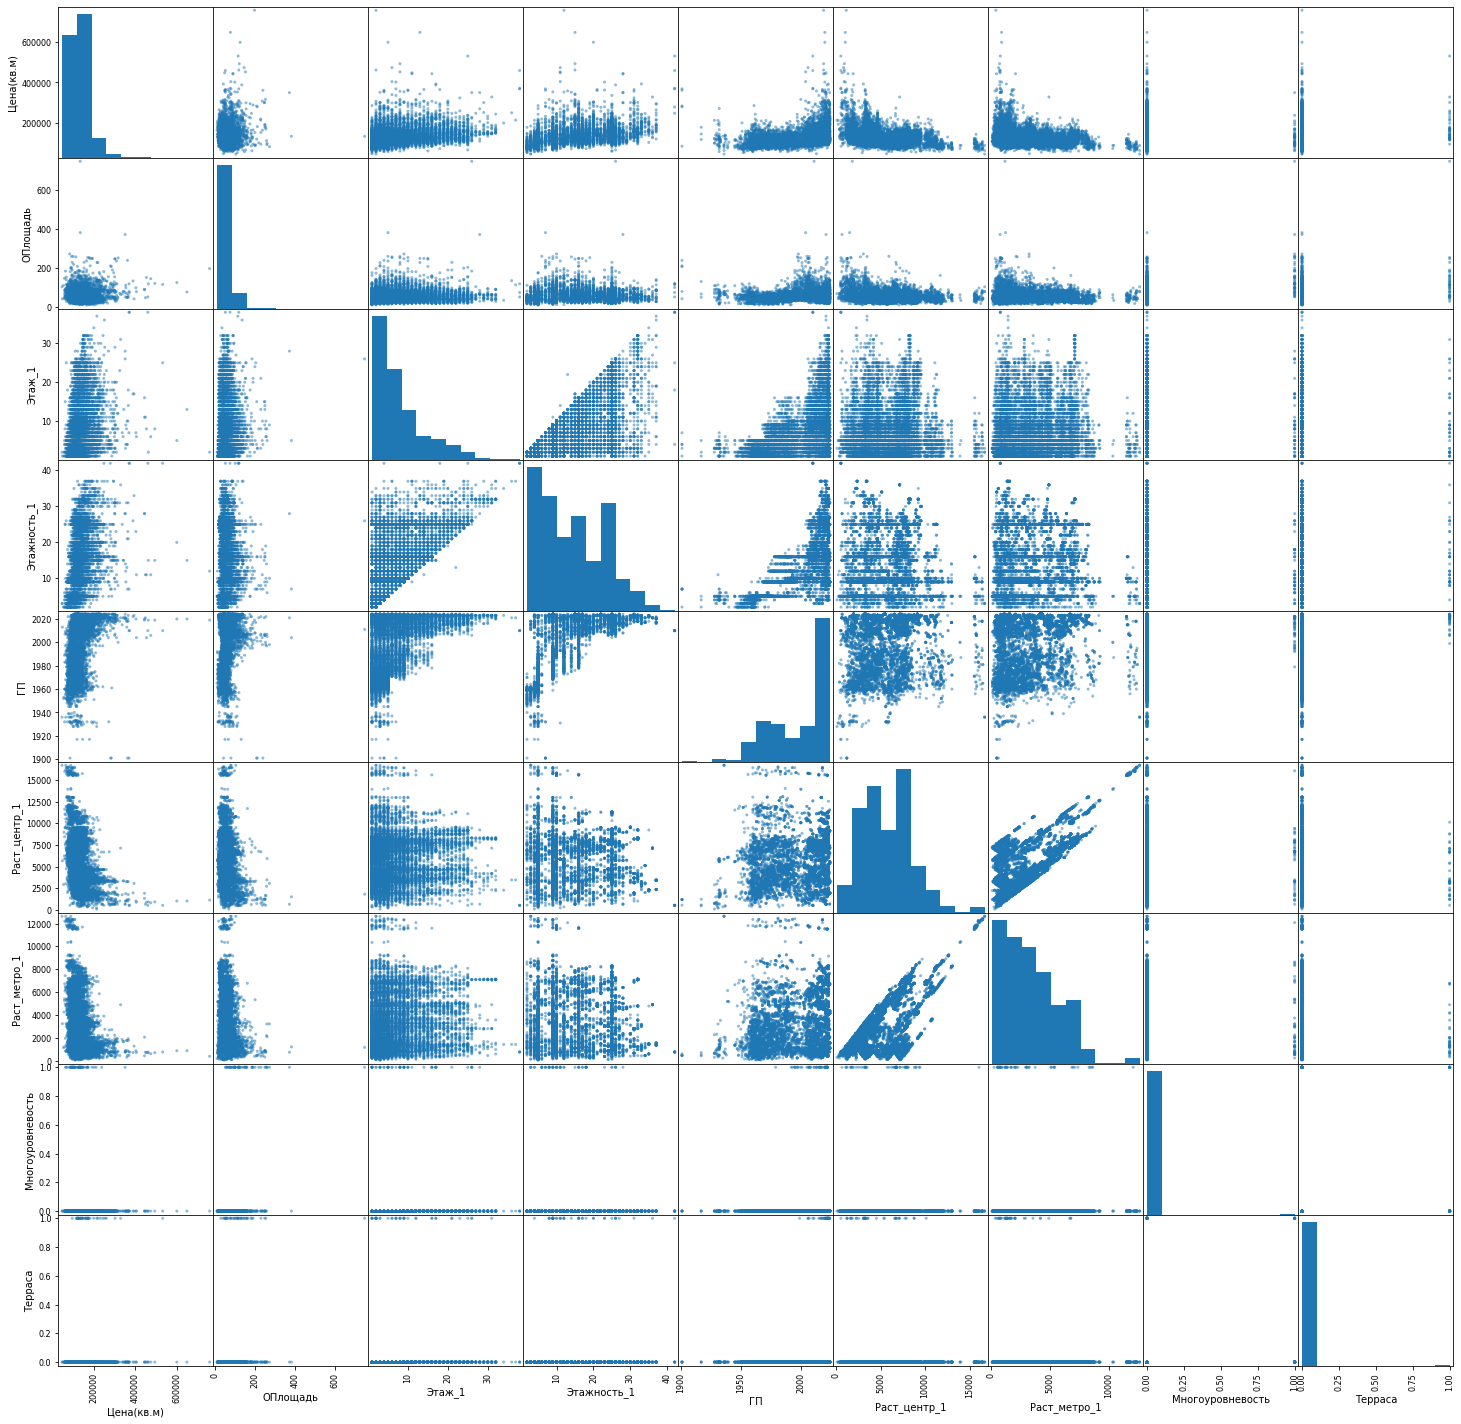

In [51]:
pd.plotting.scatter_matrix(df[['Цена(кв.м)', 'ОПлощадь', 'Комнатность', 'Этаж_1', 'Этажность_1', 'ГП', 'Раст_центр_1', 'Раст_метро_1', 'Многоуровневость', 'Терраса']], figsize=(25, 25))
plt.show()

## Матрица корреляций признаков

In [52]:
df.corr()

,Цена,Цена(кв.м),ОПлощадь,Этаж_1,Этажность_1,ГП,Раст_центр_1,Раст_метро_1,Многоуровневость,Терраса
Цена,1.000000,0.609455,0.782355,0.164540,0.196414,0.229939,-0.357716,-0.255560,0.175467,0.179225
Цена(кв.м),0.609455,1.000000,0.101962,0.289438,0.403048,0.401668,-0.404437,-0.309792,-0.004464,0.073051
ОПлощадь,0.782355,0.101962,1.000000,0.071573,0.051848,0.115832,-0.230997,-0.157757,0.272982,0.190844
Этаж_1,0.164540,0.289438,0.071573,1.000000,0.644795,0.490169,0.038279,0.052006,0.023138,0.022232
Этажность_1,0.196414,0.403048,0.051848,0.644795,1.000000,0.749651,0.027349,0.048083,-0.018160,0.012715
ГП,0.229939,0.401668,0.115832,0.490169,0.749651,1.000000,0.185388,0.226199,0.041691,0.059036
Раст_центр_1,-0.357716,-0.404437,-0.230997,0.038279,0.027349,0.185388,1.000000,0.700788,-0.002722,-0.037011
Раст_метро_1,-0.255560,-0.309792,-0.157757,0.052006,0.048083,0.226199,0.700788,1.000000,-0.011052,-0.042003
Многоуровневость,0.175467,-0.004464,0.272982,0.023138,-0.018160,0.041691,-0.002722,-0.011052,1.000000,0.236279
Терраса,0.179225,0.073051,0.190844,0.022232,0.012715,0.059036,-0.037011,-0.042003,0.236279,1.000000


<AxesSubplot:>

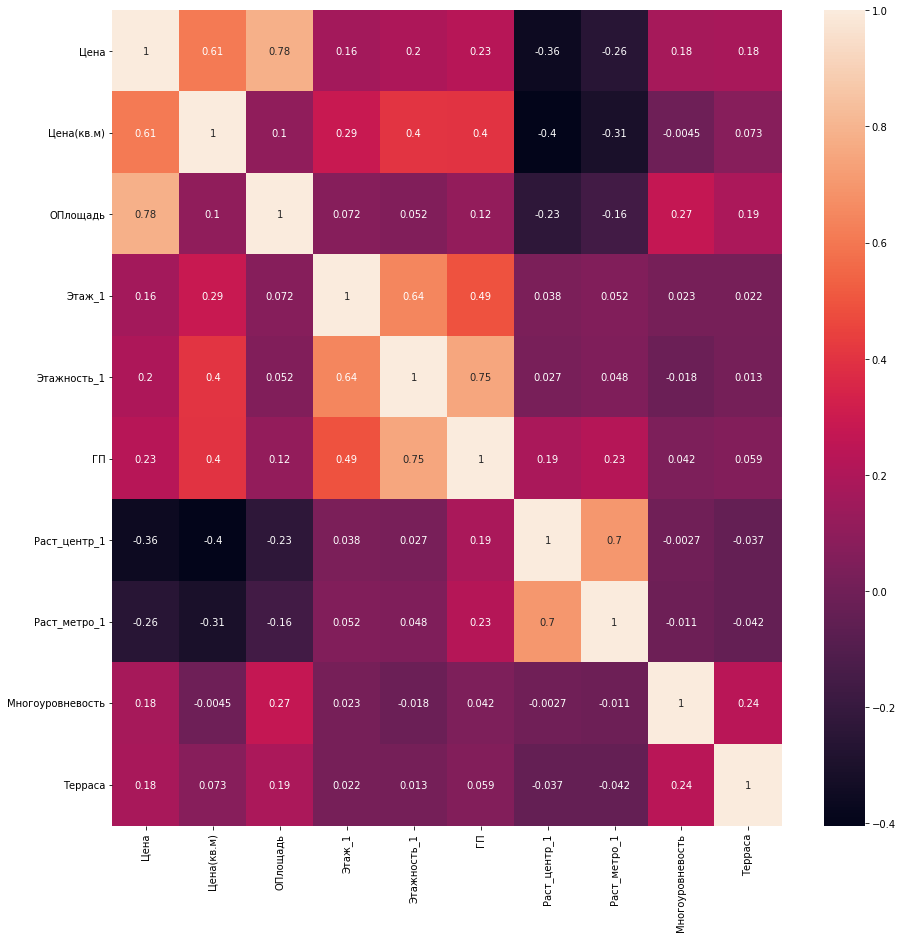

In [53]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, ax=ax)